In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import TimeGrouper
from matplotlib import pyplot
from pandas import concat
from sklearn.metrics import r2_score
from collections import Counter
import os

# How much did it rain - II ?

In [25]:
train = pd.read_csv("../Time Series datasets/rain-2/train.csv")

In [26]:
train

Id  minutes_past  radardist_km   Ref  Ref_5x5_10th  \
0               1             3          10.0   NaN           NaN   
1               1            16          10.0   NaN           NaN   
2               1            25          10.0   NaN           NaN   
3               1            35          10.0   NaN           NaN   
4               1            45          10.0   NaN           NaN   
5               1            55          10.0   NaN           NaN   
6               2             1           2.0   9.0           5.0   
7               2             6           2.0  26.5          22.5   
8               2            11           2.0  21.5          15.5   
9               2            16           2.0  18.0          14.0   
10              2            21           2.0  24.5          16.5   
11              2            26           2.0  12.0          12.0   
12              2            31           2.0  22.5          19.0   
13              2            37           2.0  14.0          14.0   
14              2            42           2.0  12.0          11.0   
15              2            47           2.0   1.5           3.5   
16              2            53           2.0  16.0          14.5   
17              2            58           2.0  22.0          16.5   
18              3             4          10.0   NaN           NaN   
19              3             9          10.0   NaN           NaN   
20              3            14          10.0   NaN           NaN   
21              3            18          10.0   NaN           NaN   
22              3            23          10.0   NaN           NaN   
23              3            28          10.0   NaN           NaN   
24              3            33          10.0   NaN           NaN   
25              3            38          10.0   NaN           NaN   
26              3            43          10.0   NaN           NaN   
27              3            48          10.0   NaN           NaN   
28              3            53          10.0   NaN           NaN   
29              3            58          10.0   NaN           NaN   
...           ...           ...           ...   ...           ...   
13765171  1180944             2          11.0   NaN           NaN   
13765172  1180944             5          11.0   NaN           NaN   
13765173  1180944             9          11.0   NaN           NaN   
13765174  1180944            13          11.0   NaN           NaN   
13765175  1180944            16          11.0   NaN           NaN   
13765176  1180944            20          11.0   NaN           NaN   
13765177  1180944            24          11.0   NaN           NaN   
13765178  1180944            27          11.0   NaN           NaN   
13765179  1180944            31          11.0   NaN           NaN   
13765180  1180944            35          11.0   NaN           NaN   
13765181  1180944            38          11.0  20.0           NaN   
13765182  1180944            42          11.0  16.5           NaN   
13765183  1180944            45          11.0  43.5          32.0   
13765184  1180944            49          11.0  28.0          28.0   
13765185  1180944            52          11.0  31.5          24.0   
13765186  1180944            56          11.0  20.5          13.5   
13765187  1180944            59          11.0   NaN           NaN   
13765188  1180945             0           9.0  26.0           NaN   
13765189  1180945             5           9.0   NaN           NaN   
13765190  1180945            10           9.0  32.0           NaN   
13765191  1180945            14           9.0  33.5           NaN   
13765192  1180945            19           9.0  43.5           9.5   
13765193  1180945            24           9.0  31.5          19.5   
13765194  1180945            28           9.0  24.0          25.5   
13765195  1180945            33           9.0  25.5          22.0   
13765196  1180945            38           9.0  33.0          19.5   
13765197  118

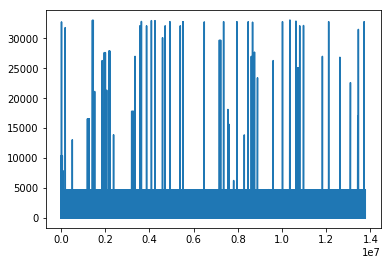

In [17]:
plt.plot(train["Expected"])
plt.show()

In [19]:
preds = np.zeros(train["Expected"].shape)

In [28]:
r2_score(train["Expected"],preds)

-0.03920570363067477

In [31]:
train[["Expected"]]

Expected
0          0.254000
1          0.254000
2          0.254000
3          0.254000
4          0.254000
5          0.254000
6          1.016000
7          1.016000
8          1.016000
9          1.016000
10         1.016000
11         1.016000
12         1.016000
13         1.016000
14         1.016000
15         1.016000
16         1.016000
17         1.016000
18        26.162014
19        26.162014
20        26.162014
21        26.162014
22        26.162014
23        26.162014
24        26.162014
25        26.162014
26        26.162014
27        26.162014
28        26.162014
29        26.162014
...             ...
13765171   3.556002
13765172   3.556002
13765173   3.556002
13765174   3.556002
13765175   3.556002
13765176   3.556002
13765177   3.556002
13765178   3.556002
13765179   3.556002
13765180   3.556002
13765181   3.556002
13765182   3.556002
13765183   3.556002
13765184   3.556002
13765185   3.556002
13765186   3.556002
13765187   3.556002
13765188   8.636004
13765189   8.636004
13765190   8.636004
13765191   8.636004
13765192   8.636004
13765193   8.636004
13765194   8.636004
13765195   8.636004
13765196   8.636004
13765197   8.636004
13765198   8.636004
13765199   8.636004
13765200   8.636004

[13765201 rows x 1 columns]

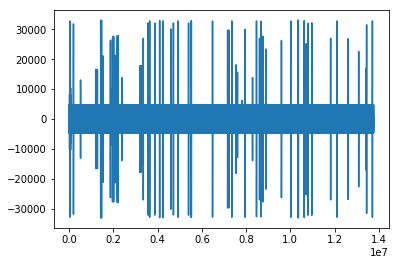

In [32]:
plt.plot(train[["Expected"]].diff())
plt.show()

# AMS Solar Energy Prediction

In [31]:
train = pd.read_csv("../Time Series datasets/solar-prediction/train.csv")

In [32]:
train

Date      ACME      ADAX      ALTU      APAC      ARNE      BEAV  \
0     19940101  12384900  11930700  12116700  12301200  10706100  10116900   
1     19940102  11908500   9778500  10862700  11666400   8062500   9262800   
2     19940103  12470700   9771900  12627300  12782700  11618400  10789800   
3     19940104  12725400   6466800  13065300  12817500  12134400  11816700   
4     19940105  10894800  11545200   8060400  10379400   6918600   9936300   
5     19940106   6639000   6817200   8157900   7673100   3500400   2245200   
6     19940107  13244700  12418800  12369900  12873000  12181800   9877800   
7     19940108  12927900  12375600  12634500  13066500  11608800  11545200   
8     19940109  12600300  11601000  12156000  12464700  10866000  11295300   
9     19940110   6406500   3935700  12321900   8164800  11328600  10785000   
10    19940111  12743400   7137000  12966300  12774600  12005100  11424900   
11    19940112  10453500   7371000  12855300  11448000  11493000  11794200   
12    19940113  12985200  12510600  13198500  12726900  12289200  12149100   
13    19940114  13080000  12552000  13446600  13026600  12393000  12227700   
14    19940115  11826300  11997300  11313300  11793300  10750200  10290600   
15    19940116   1974000   1339800   3120600   1058700   7187100   9792900   
16    19940117  13541700  13021200  13757100  13432800  12486600  11738100   
17    19940118  13673700  13042200  13881000  13586100  13158300  12724200   
18    19940119   6796800   8217000  13563300   7861800  13200900  13184700   
19    19940120   5658900   4757700   1976100   4926000   3088800  10210500   
20    19940121   7073400  10822800   4021800   6464100   4468500  11169300   
21    19940122   3354000   2764800   2997900   2726100   8875800  12647400   
22    19940123   2579700   2339100   6508500   5418600  12936900  12553500   
23    19940124   2387700   2096700   6390000   3164700   9348300   7642200   
24    19940125   8390700   8621700  11639100  11404200  11722200  13093500   
25    19940126   7326600   8104500  10221900   8622300  12958500   7973100   
26    19940127  10743900   8913000  13336500  11616000  12311700   9855300   
27    19940128  12812100  13680900  12890700  13834800  13994700  13548000   
28    19940129   9065100   5018100  10373700  10304100  13456800  13098600   
29    19940130   3954900   7685700   3863100   4220700   5629200   2520000   
...        ...       ...       ...       ...       ...       ...       ...   
5083  20071202  12177000  11132400  12620100  11796600  11907000  12604500   
5084  20071203  13453800  12737700  12828300  12809700  12264300  12439200   
5085  20071204  12525900  10054800  12328200  12057900  12027900  11833500   
5086  20071205  10543500   8691900  12200100  11790300   9699300  10742100   
5087  20071206   6214500   5707500   6339900   6242400   7813800   8302800   
5088  20071207   8417400   6139800   6981000   6928200   2229600   1899600   
5089  20071208   1683900   1832700   2153700   1853400   2145600   1705200   
5090  20071209   1512300   1394400   1685700   1443900   3815100   5288700   
5091  20071210   1729500   1530600   1451400   1747500   1628400   3313200   
5092  20071211   1512600    819600   1236900   1648800   2398800   2607600   
5093  20071212   2126100   1477500   5262600   2496900   6317400   8295600   
5094  20071213   3476400   3016200   8252400   3503700  11037600  11493600   
5095  20071214   1262700   1544700    921000   1227000   1224300   1073100   
5096  20071215   3074400   1500600   6650400   3486300   7247400   9481800   
5097  20071216  12523800  12006300  12210300  12167100  11643000  12363300   
5098  20071217  12089700  11742900  12130200  11095800  10793100  11952600   
5099  20071218  12300600  11602500  12087900  11866200  11452500  11811900   
5100  20071219  12206100  11478000  12020400  11741100  10871400  11946600   
5101  20071220  12275700  11530800  12134400  11865600  11614800  11707500   
5102  20071221   9737700   96111

In [4]:
train.Date = train.Date.astype(str)

In [5]:
year = []
month = []
for i in train["Date"]:
    year.append(i[:-4])
    month.append(i[4:6])
consider_year = year[year.index('2000') : year.index('2000') + 366]

In [6]:
train["year"] = year
train["month"] = month

In [7]:
train

Date      ACME      ADAX      ALTU      APAC      ARNE      BEAV  \
0     19940101  12384900  11930700  12116700  12301200  10706100  10116900   
1     19940102  11908500   9778500  10862700  11666400   8062500   9262800   
2     19940103  12470700   9771900  12627300  12782700  11618400  10789800   
3     19940104  12725400   6466800  13065300  12817500  12134400  11816700   
4     19940105  10894800  11545200   8060400  10379400   6918600   9936300   
5     19940106   6639000   6817200   8157900   7673100   3500400   2245200   
6     19940107  13244700  12418800  12369900  12873000  12181800   9877800   
7     19940108  12927900  12375600  12634500  13066500  11608800  11545200   
8     19940109  12600300  11601000  12156000  12464700  10866000  11295300   
9     19940110   6406500   3935700  12321900   8164800  11328600  10785000   
10    19940111  12743400   7137000  12966300  12774600  12005100  11424900   
11    19940112  10453500   7371000  12855300  11448000  11493000  11794200   
12    19940113  12985200  12510600  13198500  12726900  12289200  12149100   
13    19940114  13080000  12552000  13446600  13026600  12393000  12227700   
14    19940115  11826300  11997300  11313300  11793300  10750200  10290600   
15    19940116   1974000   1339800   3120600   1058700   7187100   9792900   
16    19940117  13541700  13021200  13757100  13432800  12486600  11738100   
17    19940118  13673700  13042200  13881000  13586100  13158300  12724200   
18    19940119   6796800   8217000  13563300   7861800  13200900  13184700   
19    19940120   5658900   4757700   1976100   4926000   3088800  10210500   
20    19940121   7073400  10822800   4021800   6464100   4468500  11169300   
21    19940122   3354000   2764800   2997900   2726100   8875800  12647400   
22    19940123   2579700   2339100   6508500   5418600  12936900  12553500   
23    19940124   2387700   2096700   6390000   3164700   9348300   7642200   
24    19940125   8390700   8621700  11639100  11404200  11722200  13093500   
25    19940126   7326600   8104500  10221900   8622300  12958500   7973100   
26    19940127  10743900   8913000  13336500  11616000  12311700   9855300   
27    19940128  12812100  13680900  12890700  13834800  13994700  13548000   
28    19940129   9065100   5018100  10373700  10304100  13456800  13098600   
29    19940130   3954900   7685700   3863100   4220700   5629200   2520000   
...        ...       ...       ...       ...       ...       ...       ...   
5083  20071202  12177000  11132400  12620100  11796600  11907000  12604500   
5084  20071203  13453800  12737700  12828300  12809700  12264300  12439200   
5085  20071204  12525900  10054800  12328200  12057900  12027900  11833500   
5086  20071205  10543500   8691900  12200100  11790300   9699300  10742100   
5087  20071206   6214500   5707500   6339900   6242400   7813800   8302800   
5088  20071207   8417400   6139800   6981000   6928200   2229600   1899600   
5089  20071208   1683900   1832700   2153700   1853400   2145600   1705200   
5090  20071209   1512300   1394400   1685700   1443900   3815100   5288700   
5091  20071210   1729500   1530600   1451400   1747500   1628400   3313200   
5092  20071211   1512600    819600   1236900   1648800   2398800   2607600   
5093  20071212   2126100   1477500   5262600   2496900   6317400   8295600   
5094  20071213   3476400   3016200   8252400   3503700  11037600  11493600   
5095  20071214   1262700   1544700    921000   1227000   1224300   1073100   
5096  20071215   3074400   1500600   6650400   3486300   7247400   9481800   
5097  20071216  12523800  12006300  12210300  12167100  11643000  12363300   
5098  20071217  12089700  11742900  12130200  11095800  10793100  11952600   
5099  20071218  12300600  11602500  12087900  11866200  11452500  11811900   
5100  20071219  12206100  11478000  12020400  11741100  10871400  11946600   
5101  20071220  12275700  11530800  12134400  11865600  11614800  11707500   
5102  20071221   9737700   96111

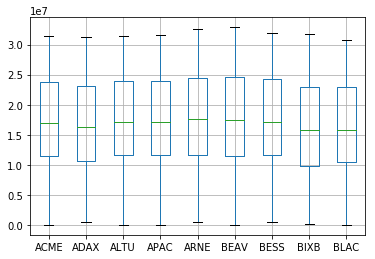

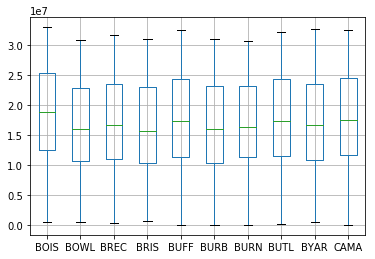

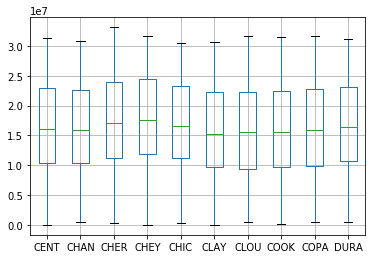

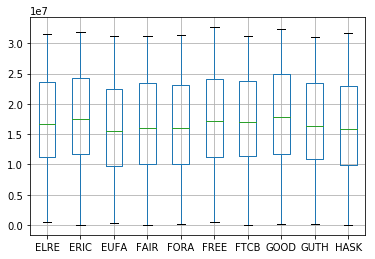

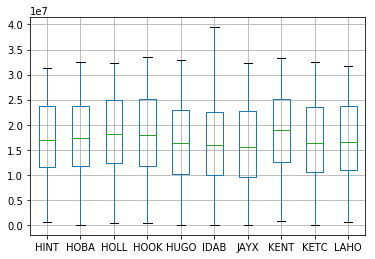

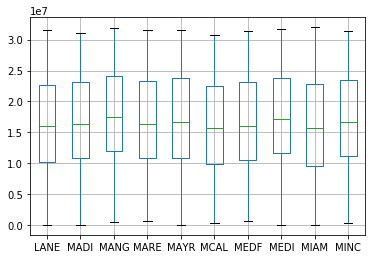

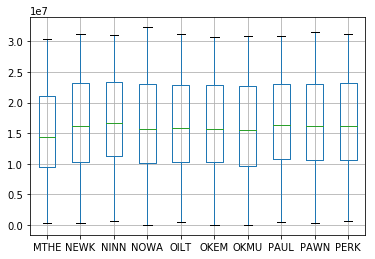

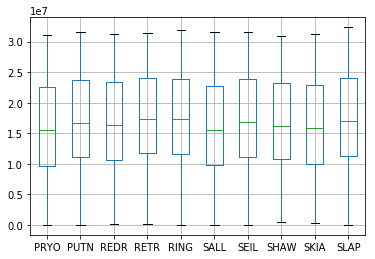

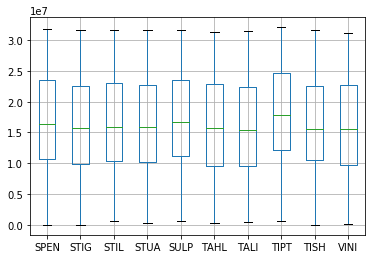

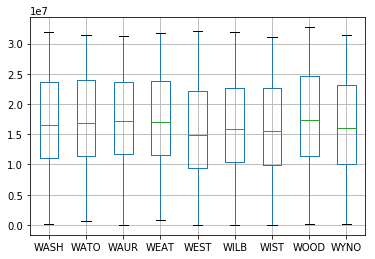

In [8]:
for counter in range(0,91,10):
    train[train.columns[counter:counter+10]].boxplot()
    plt.show()

/opt/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/opt/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


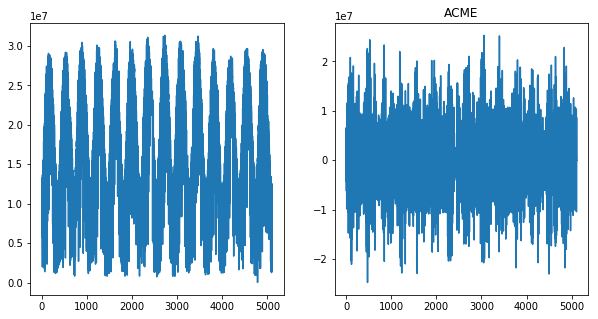

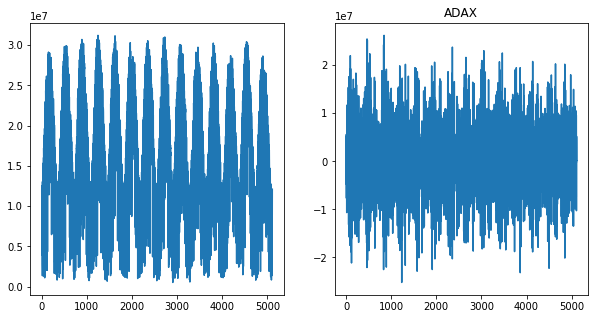

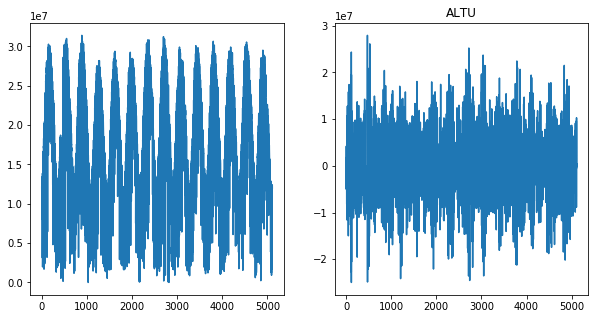

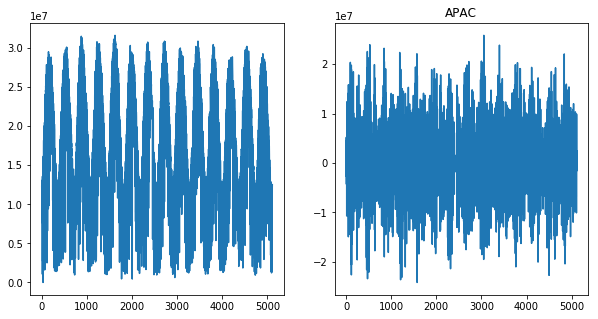

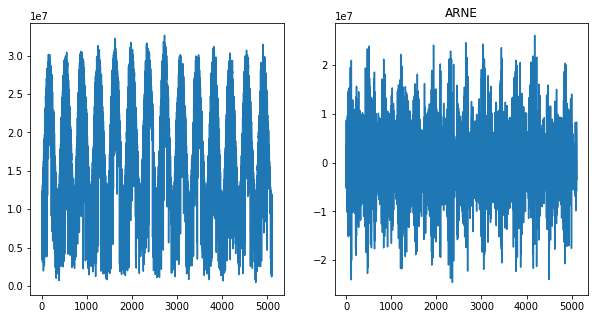

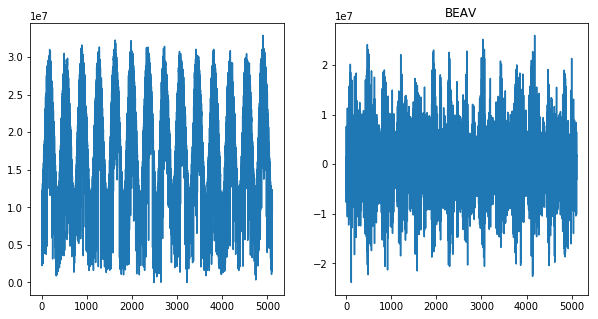

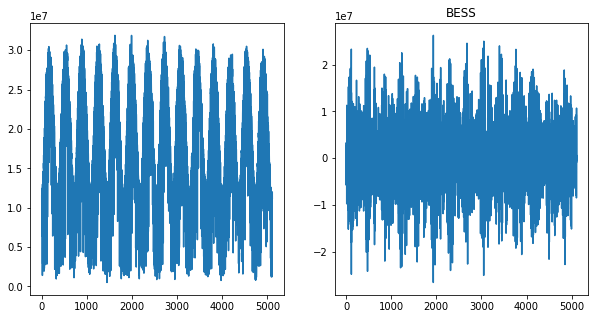

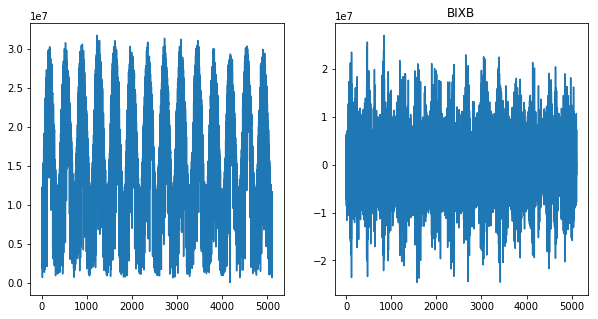

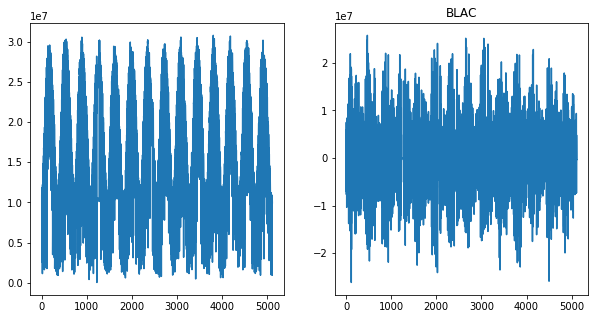

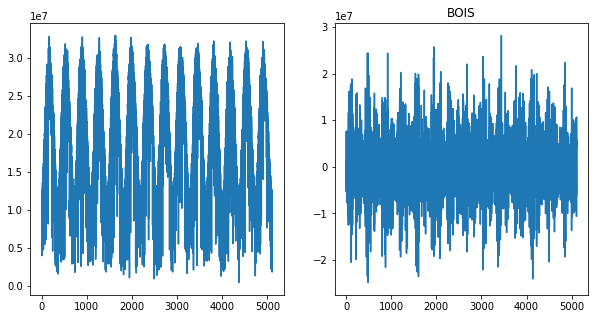

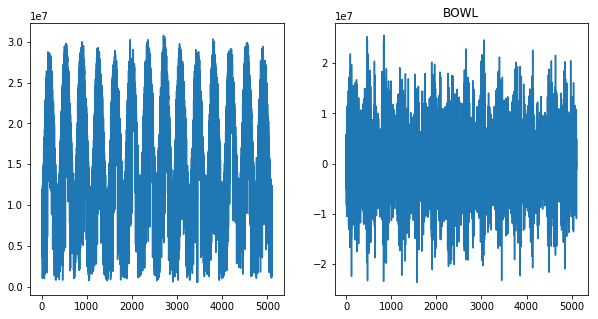

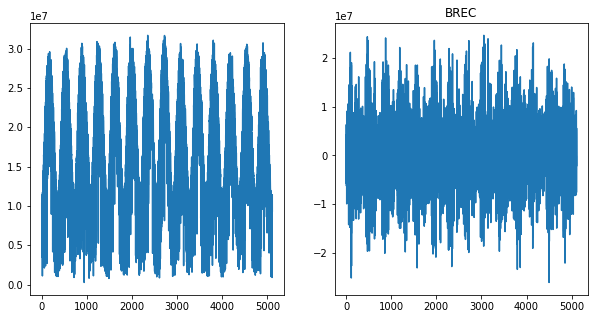

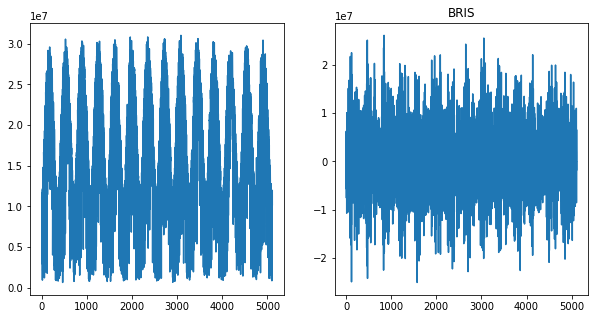

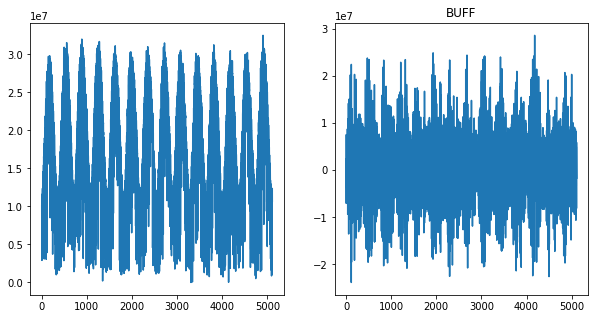

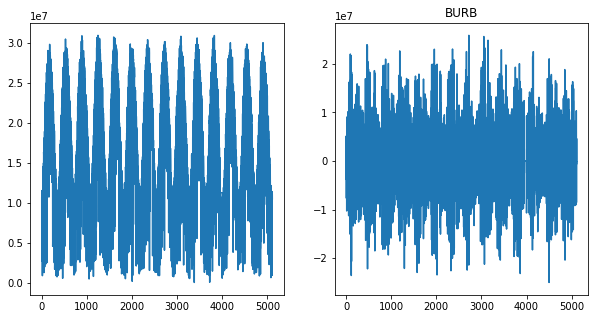

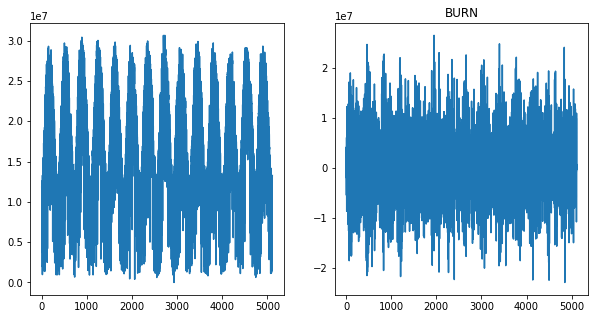

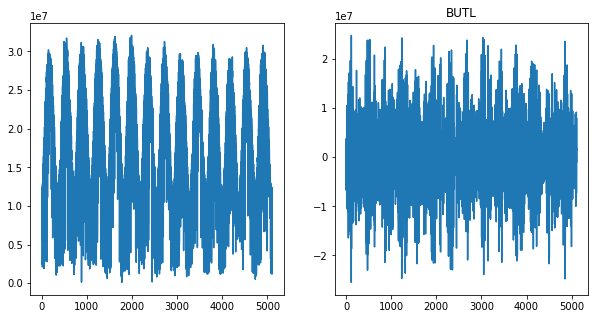

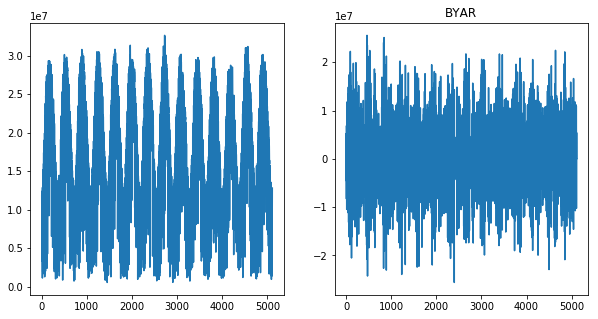

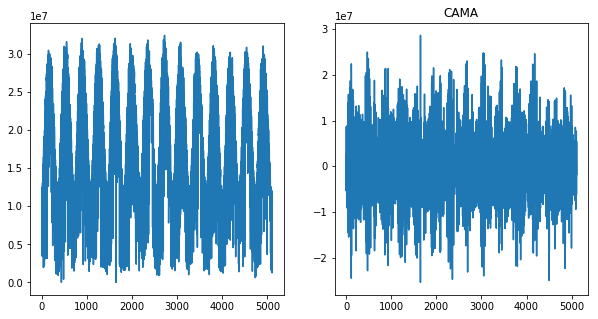

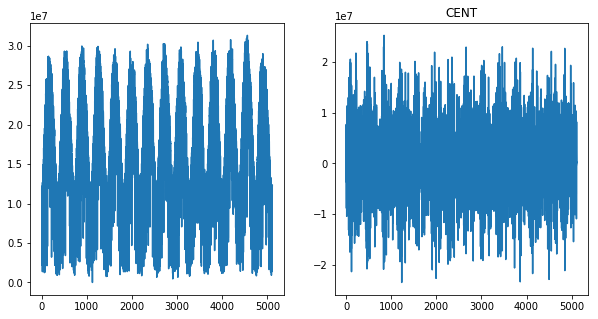

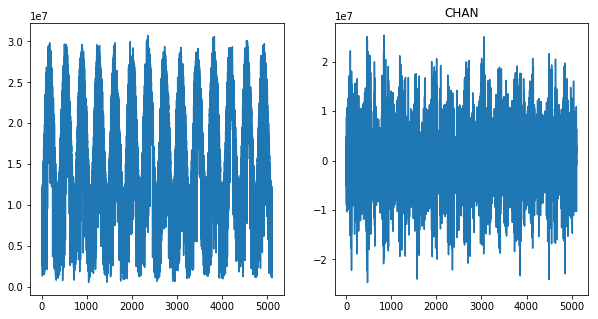

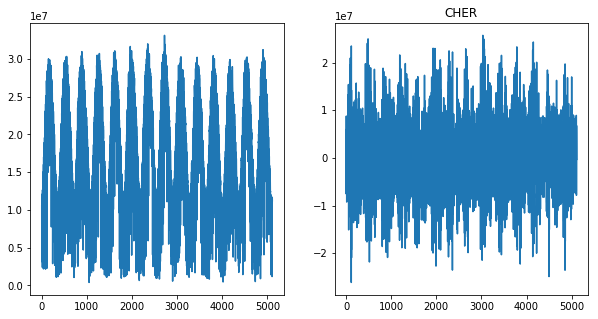

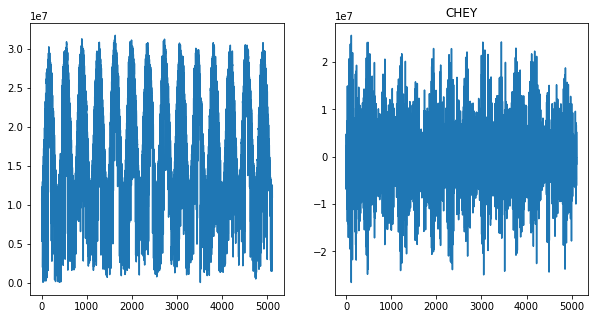

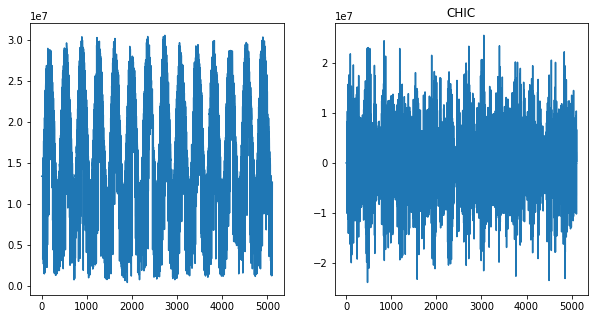

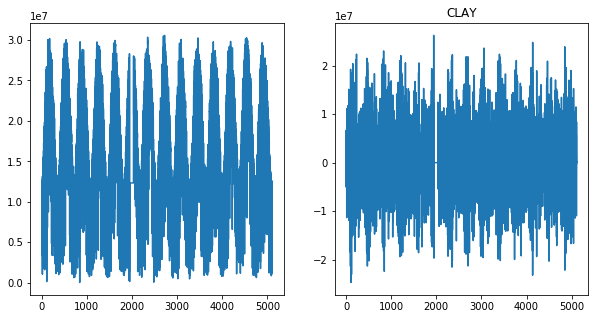

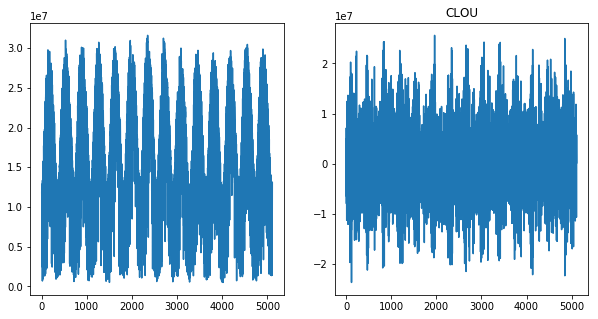

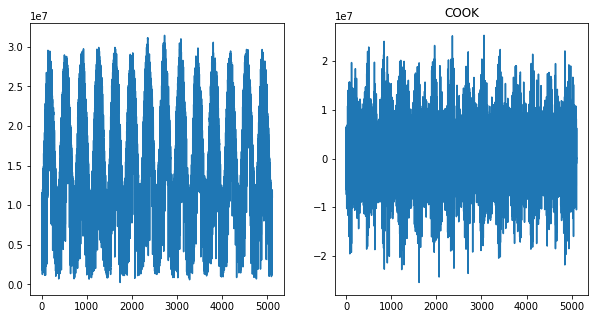

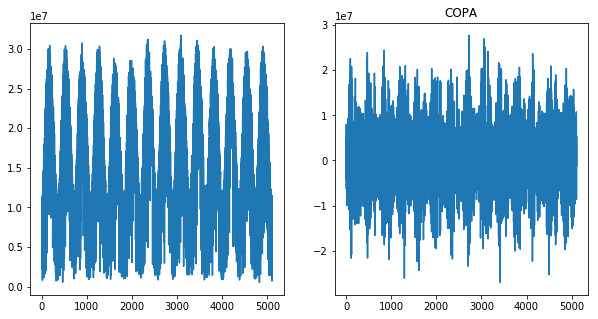

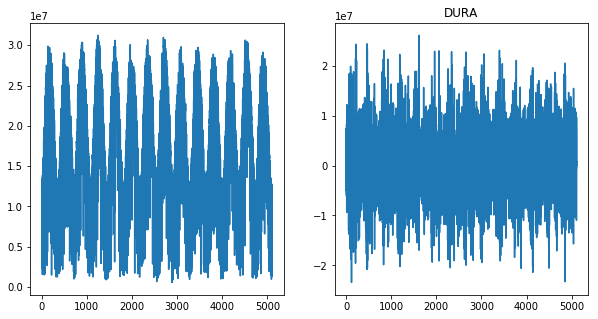

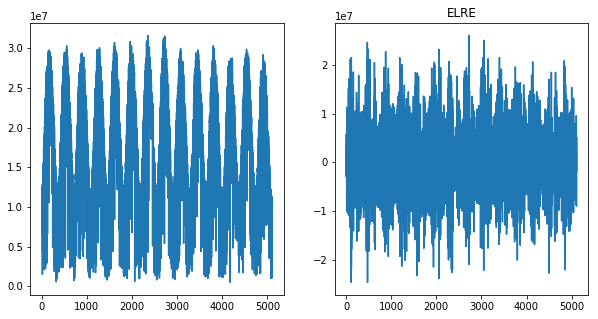

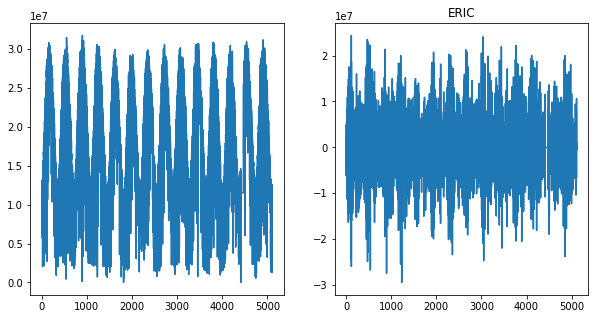

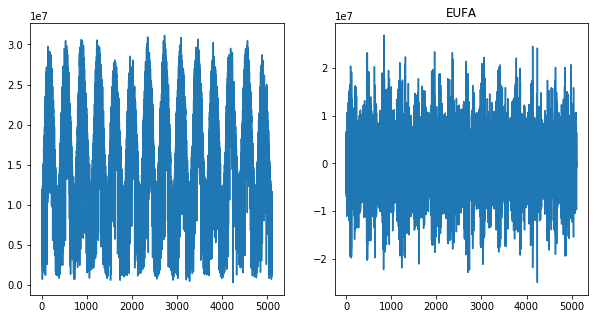

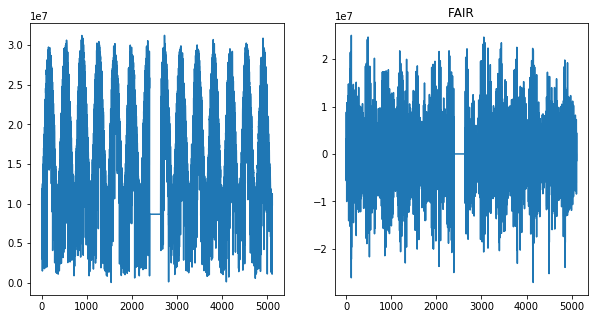

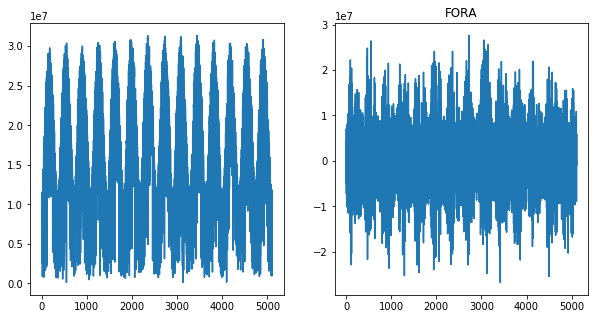

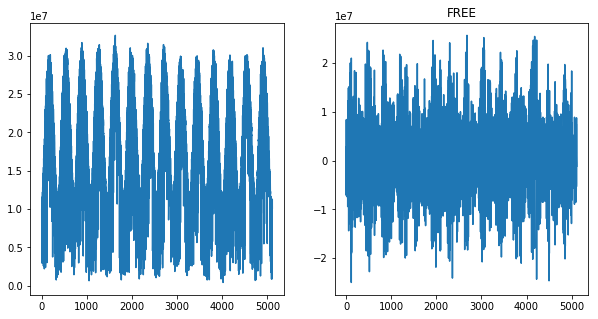

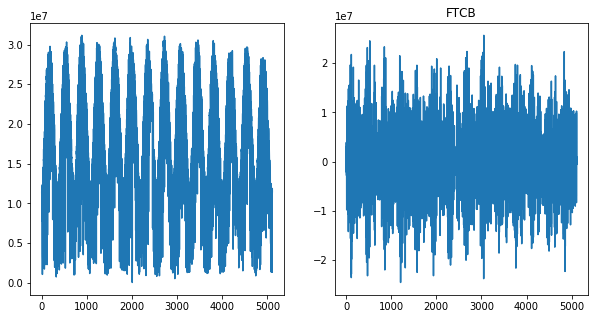

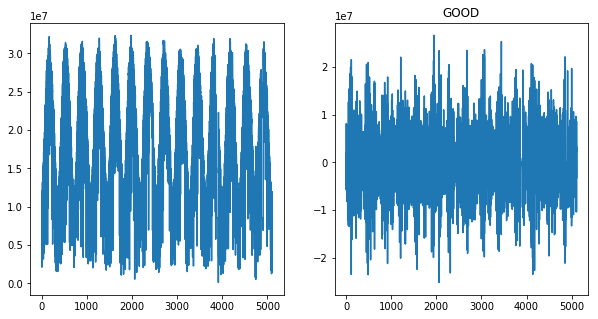

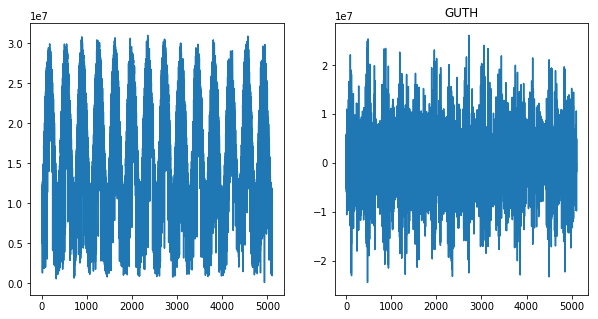

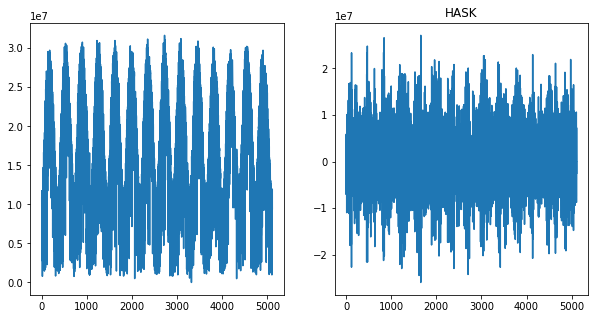

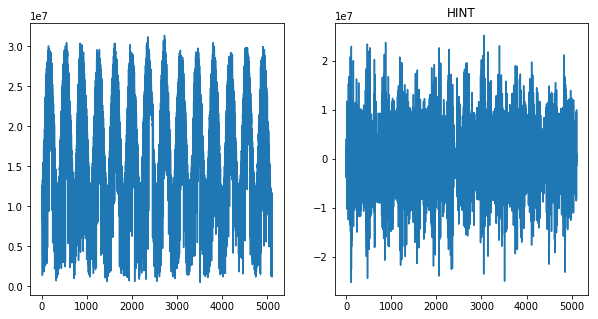

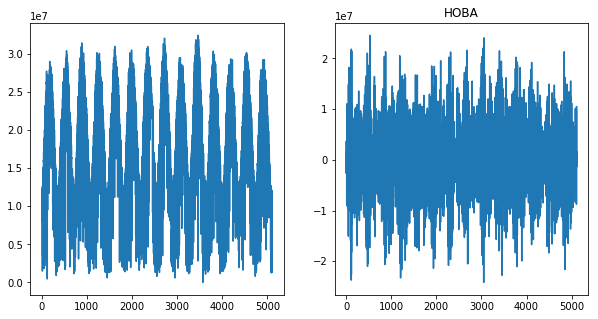

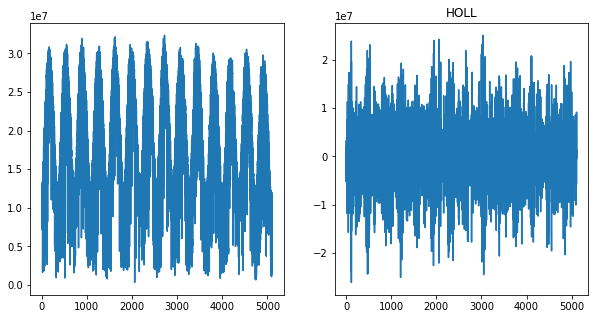

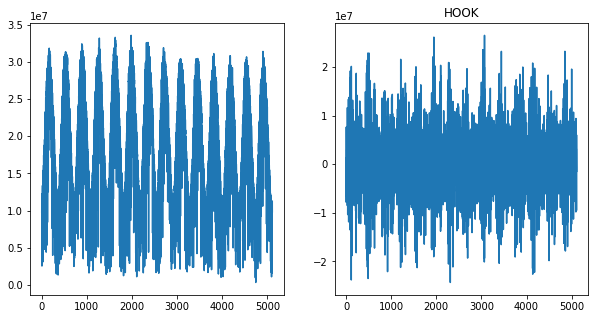

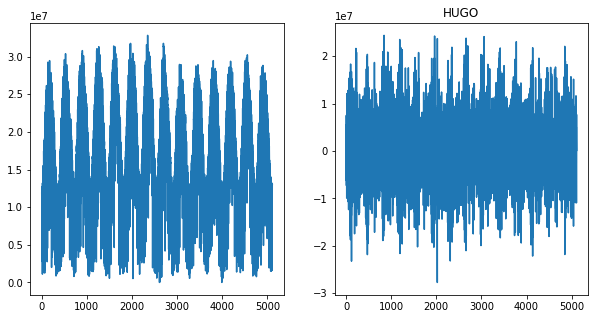

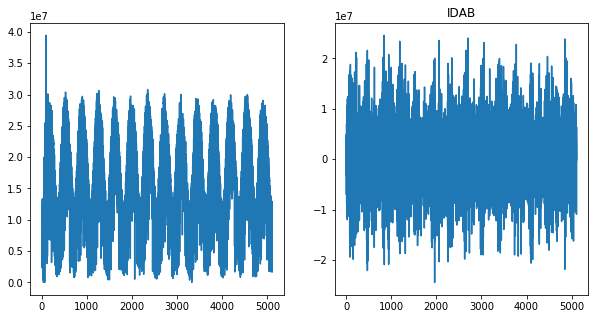

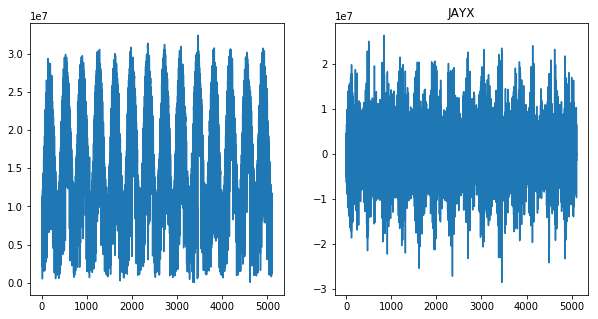

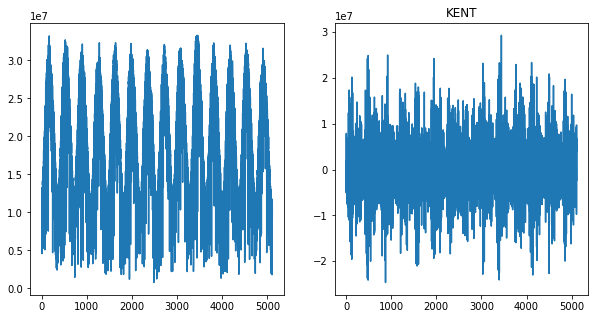

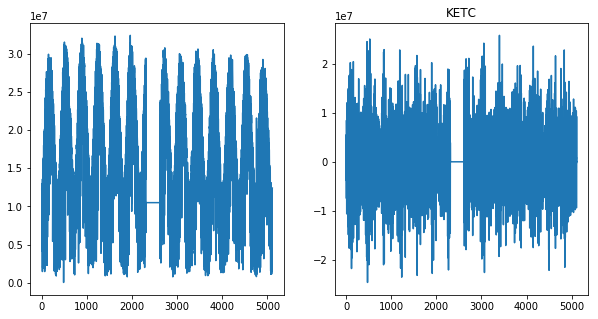

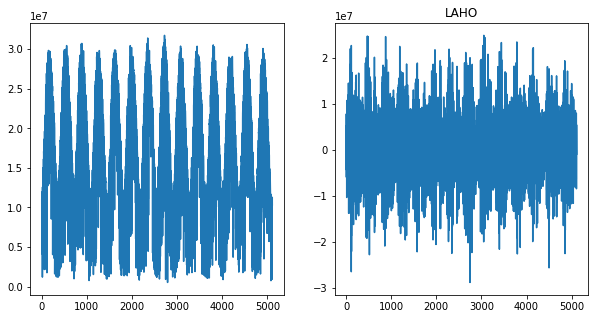

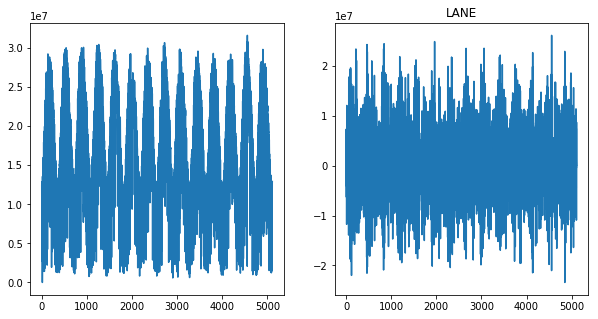

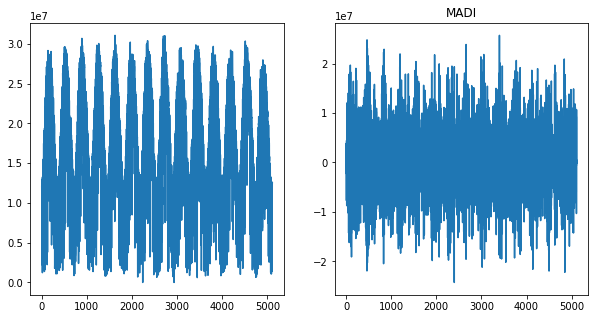

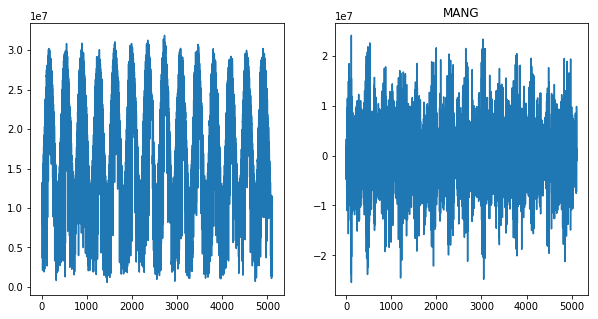

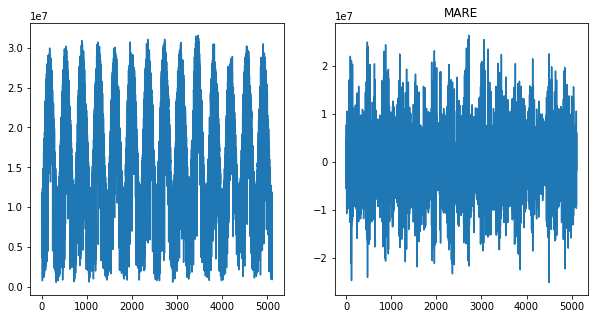

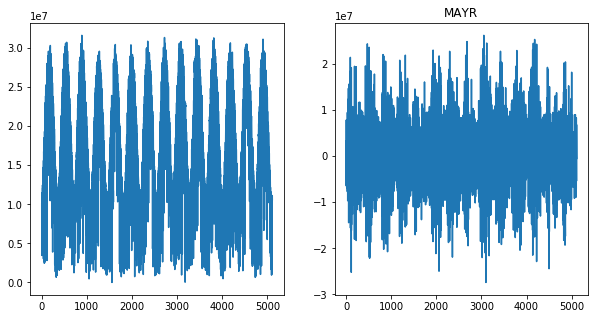

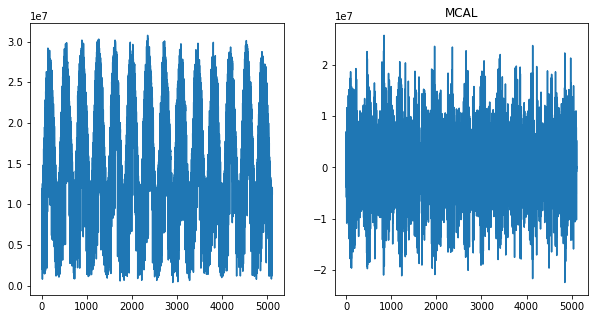

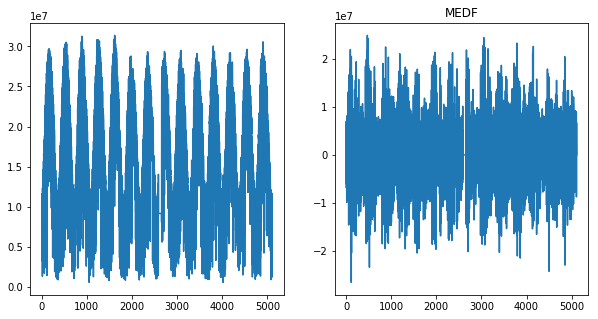

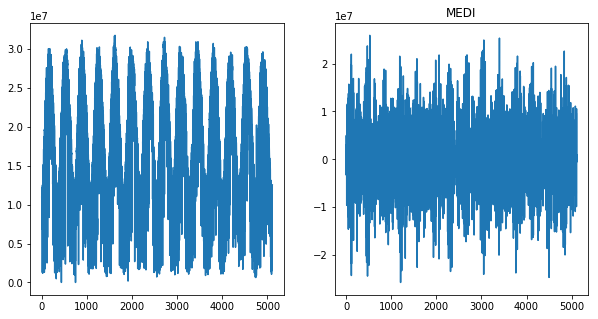

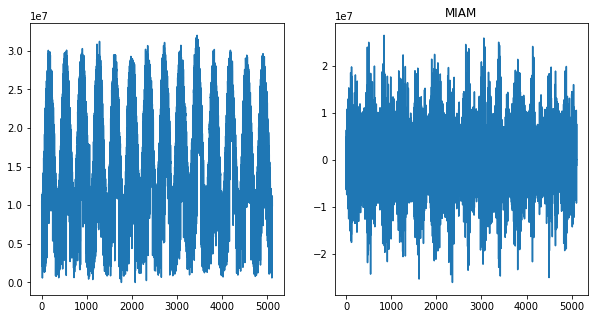

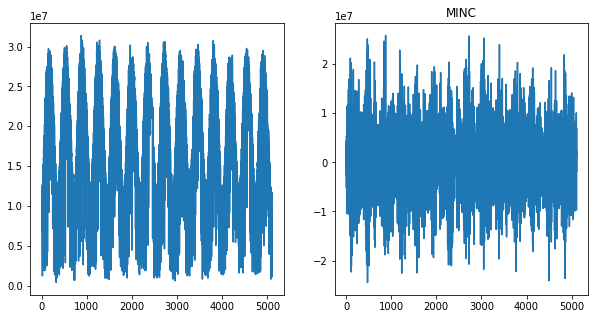

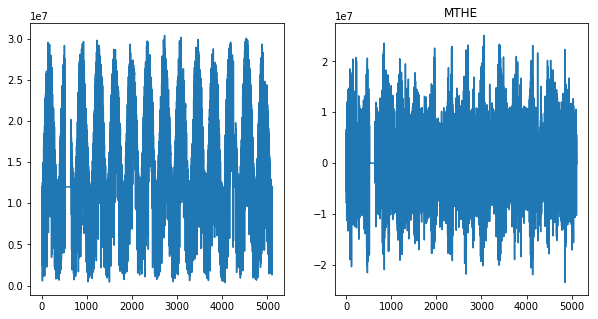

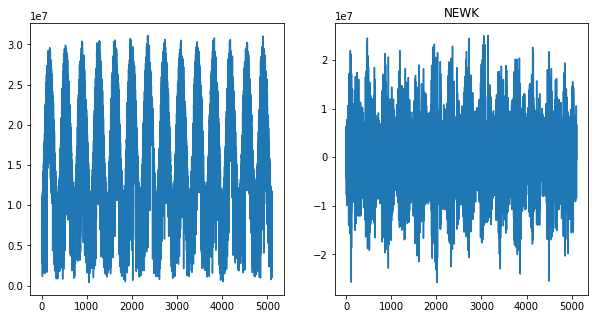

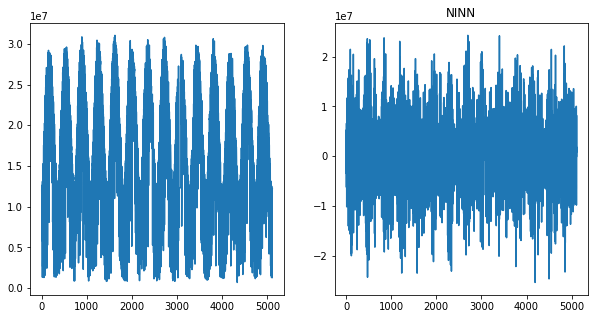

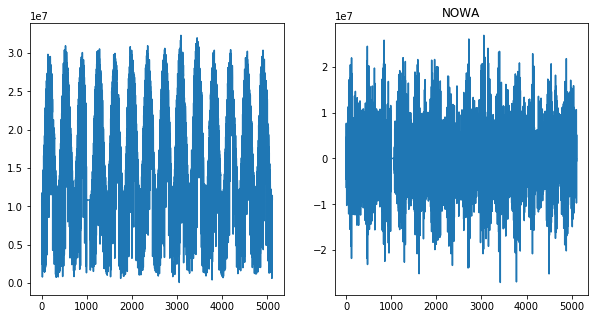

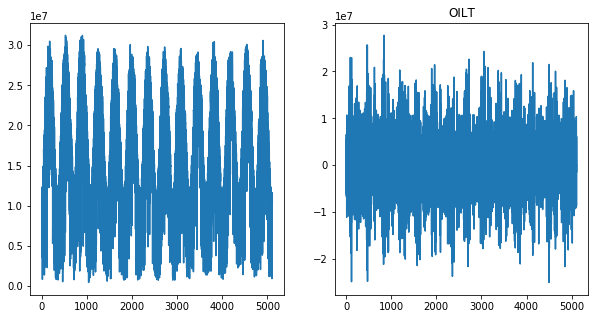

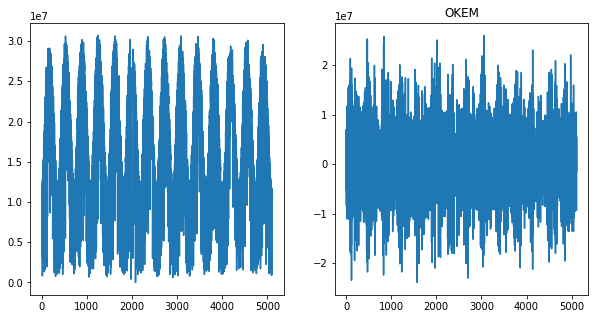

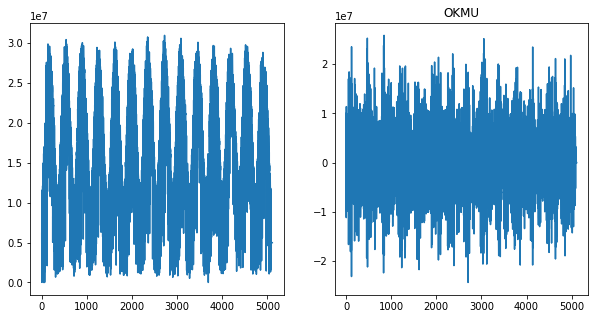

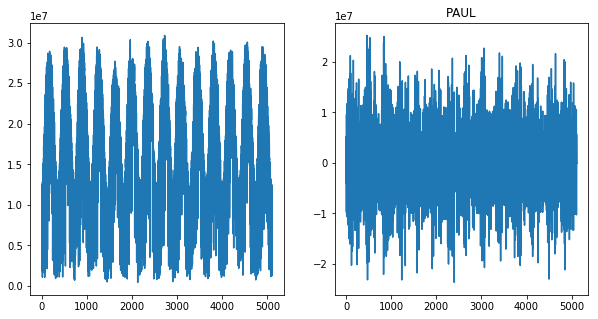

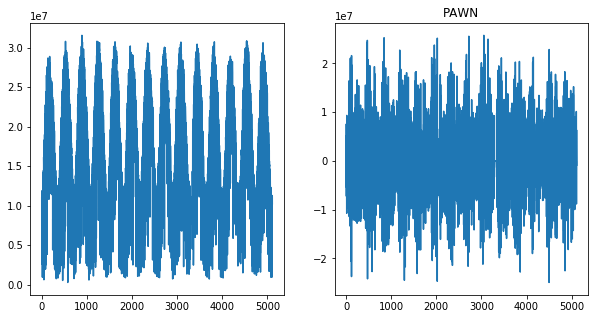

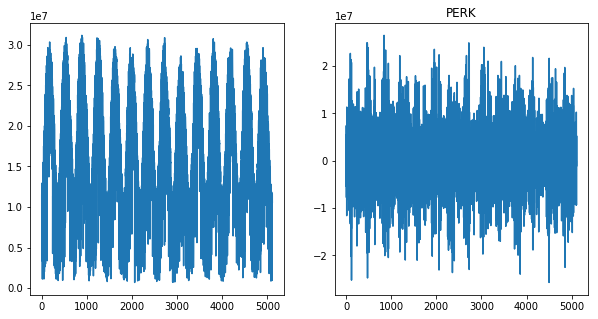

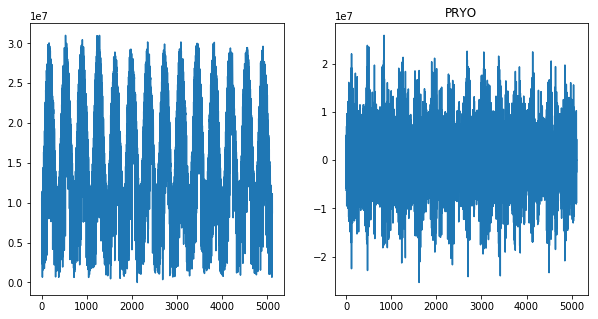

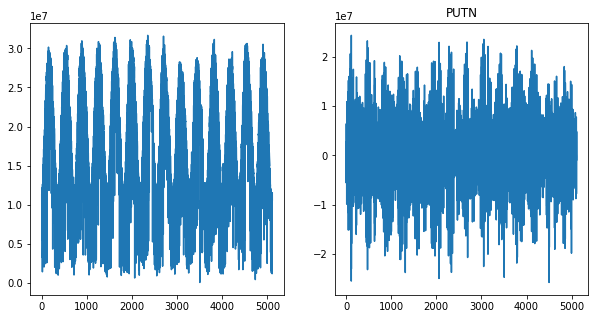

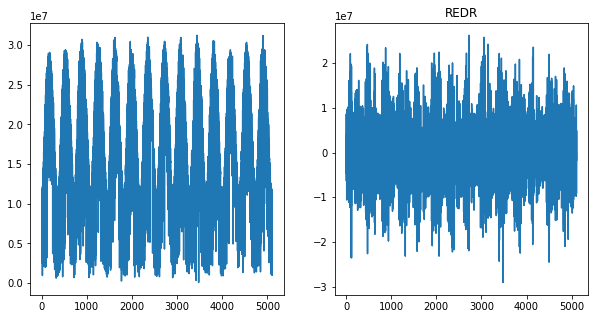

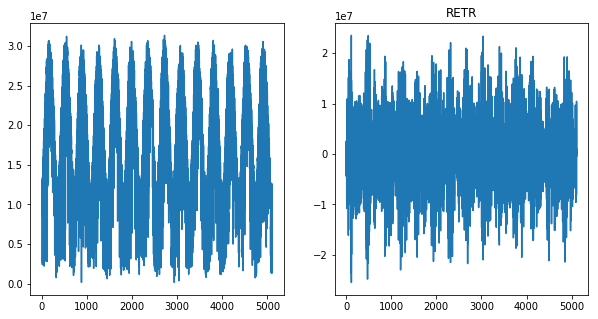

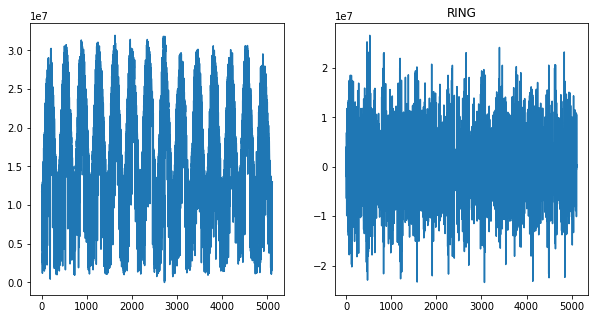

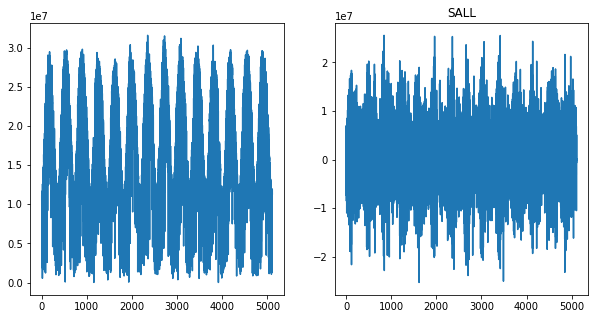

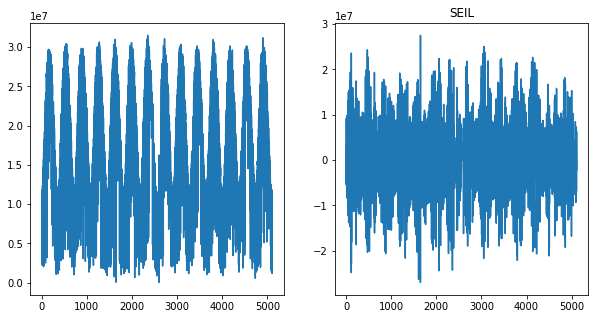

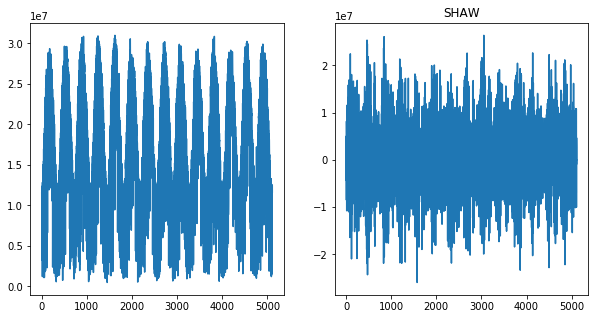

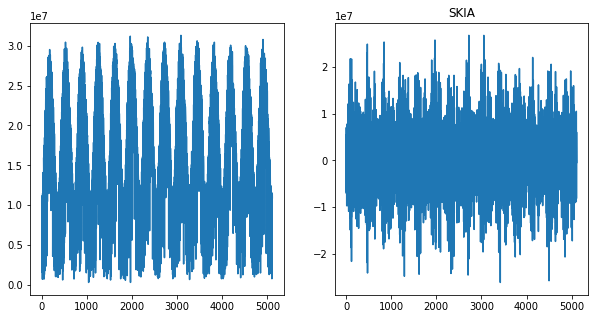

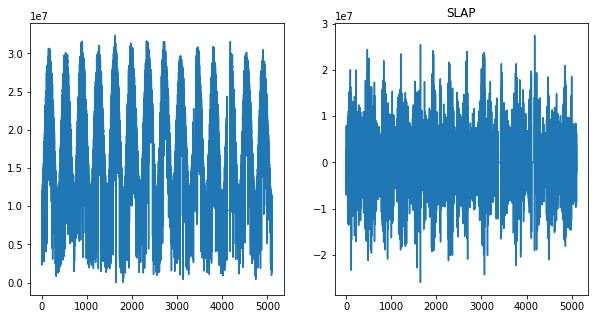

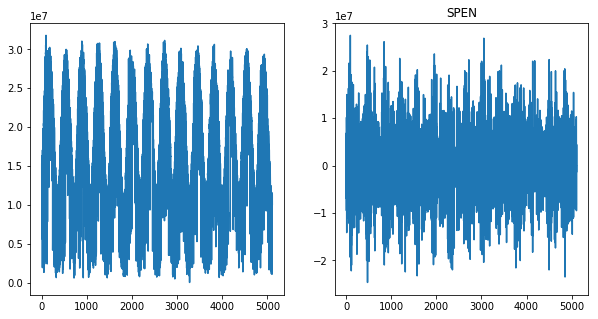

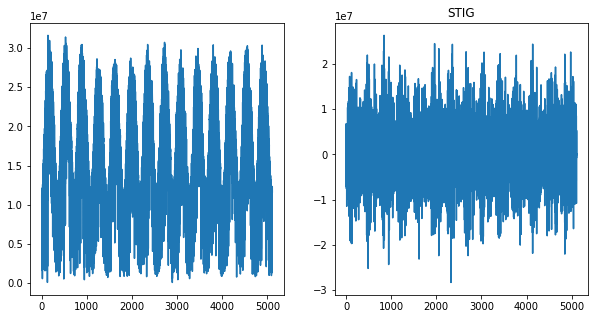

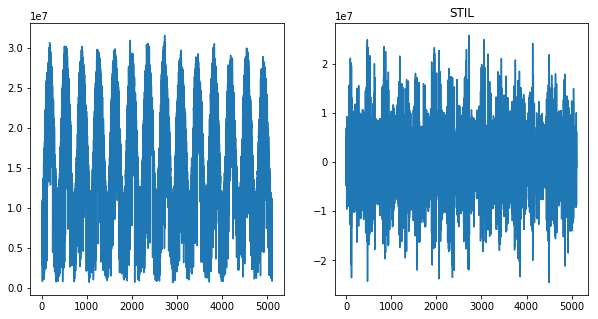

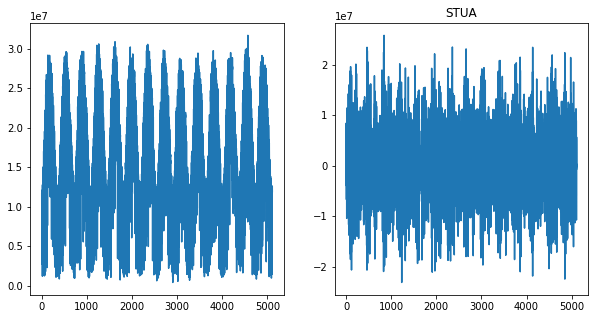

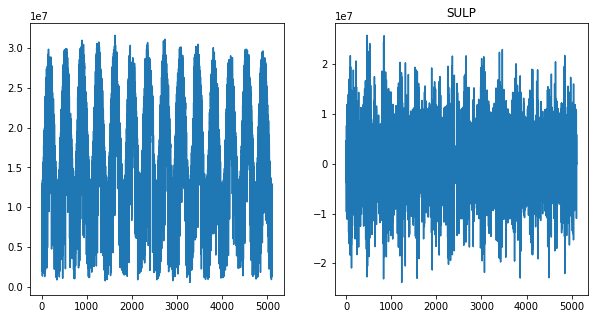

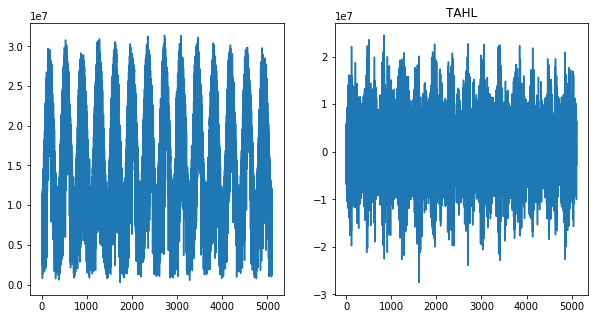

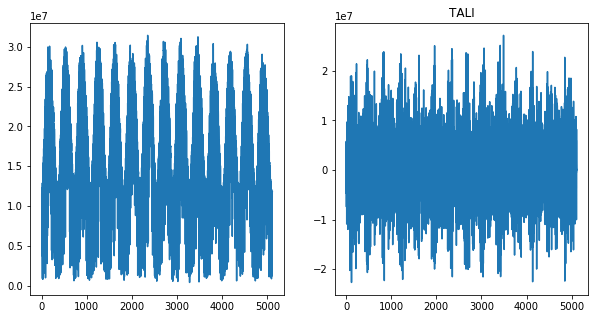

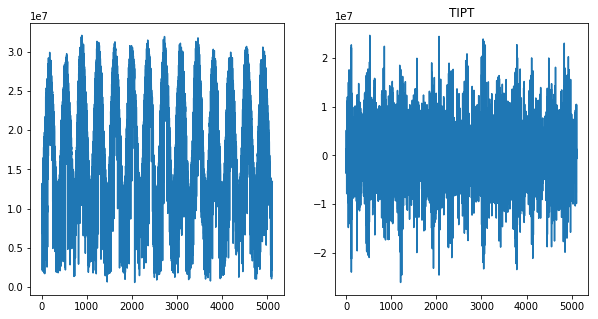

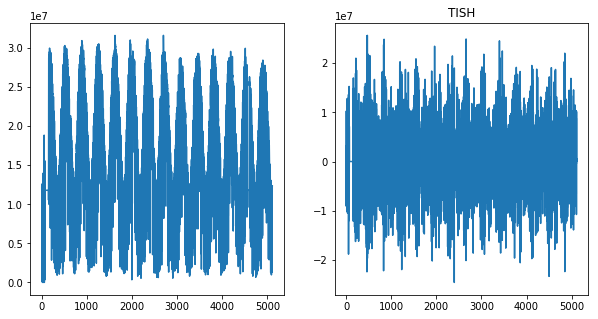

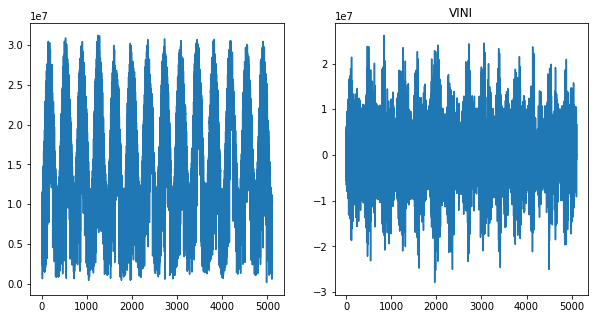

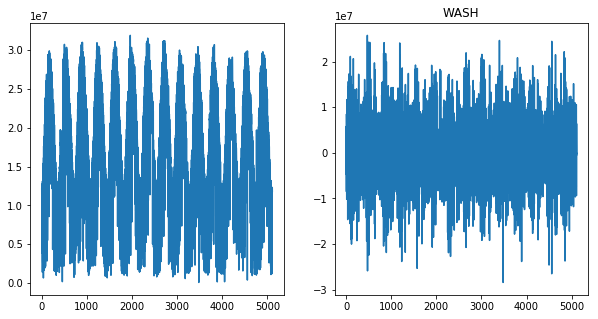

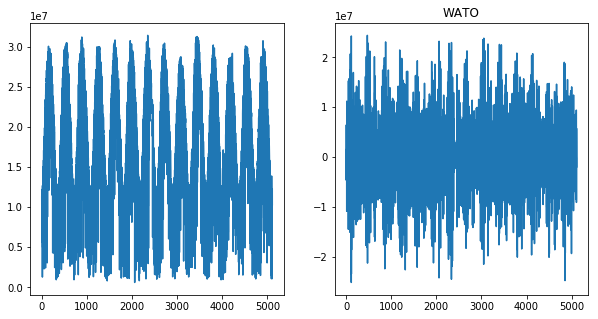

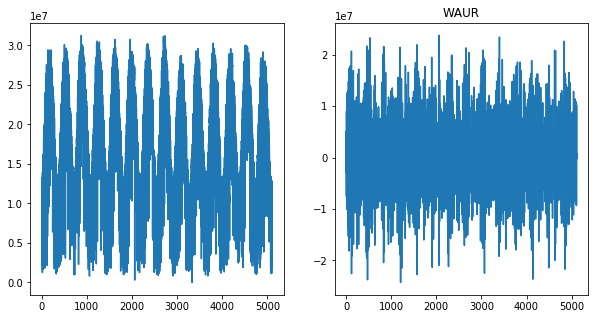

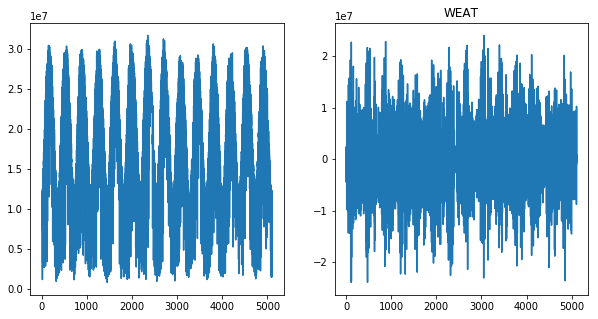

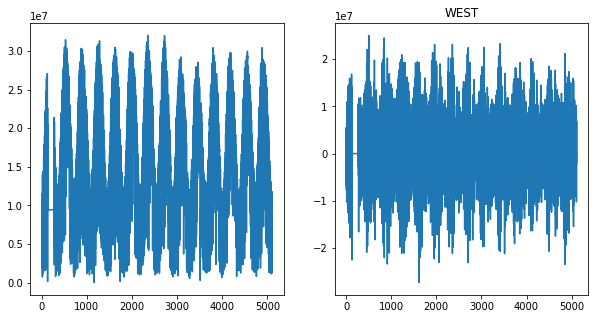

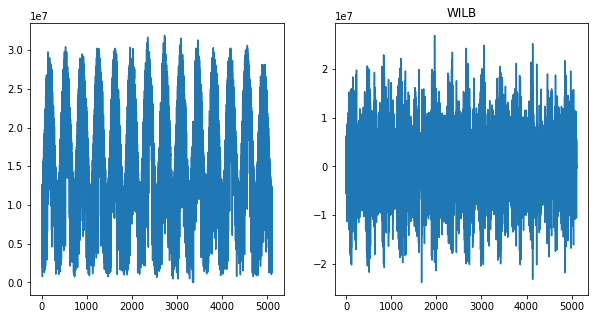

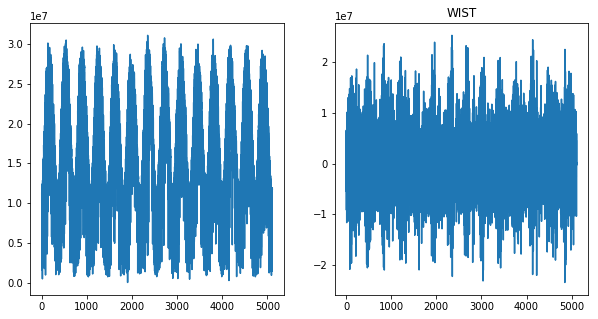

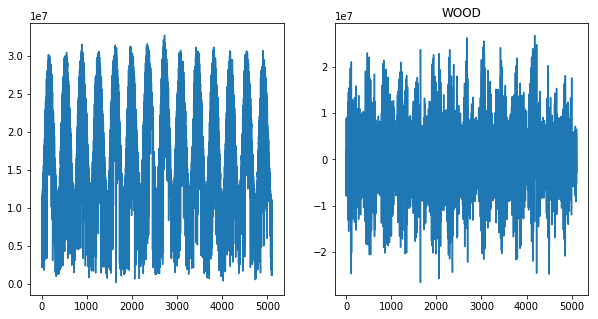

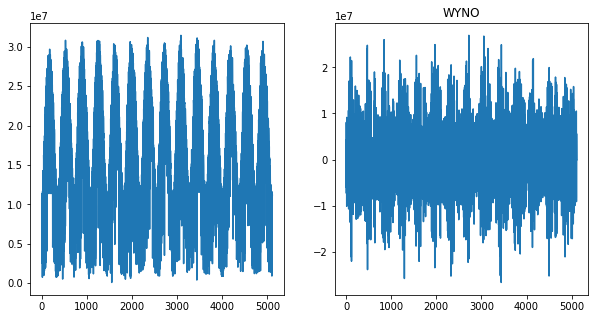

In [10]:
for col in train.columns[1:-2]:
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    plt.title(col)
    ax[0].plot(train[[col]])
    ax[1].plot(train[[col]].diff())
    fig.show()

# Wind Forecasting

In [11]:
train = pd.read_csv("../Time Series datasets/wind-prediction/train.csv")

FileNotFoundError: File b'../Time Series datasets/wind-prediction/train.csv' does not exist

In [4]:
train.Date = train.Date.astype(str)

In [5]:
year = []
month = []
for i in train["Date"]:
    year.append(i[:-4])
    month.append(i[4:6])
consider_year = year[year.index('2000') : year.index('2000') + 366]

In [6]:
train["year"] = year
train["month"] = month

In [7]:
train

Date      ACME      ADAX      ALTU      APAC      ARNE      BEAV  \
0     19940101  12384900  11930700  12116700  12301200  10706100  10116900   
1     19940102  11908500   9778500  10862700  11666400   8062500   9262800   
2     19940103  12470700   9771900  12627300  12782700  11618400  10789800   
3     19940104  12725400   6466800  13065300  12817500  12134400  11816700   
4     19940105  10894800  11545200   8060400  10379400   6918600   9936300   
5     19940106   6639000   6817200   8157900   7673100   3500400   2245200   
6     19940107  13244700  12418800  12369900  12873000  12181800   9877800   
7     19940108  12927900  12375600  12634500  13066500  11608800  11545200   
8     19940109  12600300  11601000  12156000  12464700  10866000  11295300   
9     19940110   6406500   3935700  12321900   8164800  11328600  10785000   
10    19940111  12743400   7137000  12966300  12774600  12005100  11424900   
11    19940112  10453500   7371000  12855300  11448000  11493000  11794200   
12    19940113  12985200  12510600  13198500  12726900  12289200  12149100   
13    19940114  13080000  12552000  13446600  13026600  12393000  12227700   
14    19940115  11826300  11997300  11313300  11793300  10750200  10290600   
15    19940116   1974000   1339800   3120600   1058700   7187100   9792900   
16    19940117  13541700  13021200  13757100  13432800  12486600  11738100   
17    19940118  13673700  13042200  13881000  13586100  13158300  12724200   
18    19940119   6796800   8217000  13563300   7861800  13200900  13184700   
19    19940120   5658900   4757700   1976100   4926000   3088800  10210500   
20    19940121   7073400  10822800   4021800   6464100   4468500  11169300   
21    19940122   3354000   2764800   2997900   2726100   8875800  12647400   
22    19940123   2579700   2339100   6508500   5418600  12936900  12553500   
23    19940124   2387700   2096700   6390000   3164700   9348300   7642200   
24    19940125   8390700   8621700  11639100  11404200  11722200  13093500   
25    19940126   7326600   8104500  10221900   8622300  12958500   7973100   
26    19940127  10743900   8913000  13336500  11616000  12311700   9855300   
27    19940128  12812100  13680900  12890700  13834800  13994700  13548000   
28    19940129   9065100   5018100  10373700  10304100  13456800  13098600   
29    19940130   3954900   7685700   3863100   4220700   5629200   2520000   
...        ...       ...       ...       ...       ...       ...       ...   
5083  20071202  12177000  11132400  12620100  11796600  11907000  12604500   
5084  20071203  13453800  12737700  12828300  12809700  12264300  12439200   
5085  20071204  12525900  10054800  12328200  12057900  12027900  11833500   
5086  20071205  10543500   8691900  12200100  11790300   9699300  10742100   
5087  20071206   6214500   5707500   6339900   6242400   7813800   8302800   
5088  20071207   8417400   6139800   6981000   6928200   2229600   1899600   
5089  20071208   1683900   1832700   2153700   1853400   2145600   1705200   
5090  20071209   1512300   1394400   1685700   1443900   3815100   5288700   
5091  20071210   1729500   1530600   1451400   1747500   1628400   3313200   
5092  20071211   1512600    819600   1236900   1648800   2398800   2607600   
5093  20071212   2126100   1477500   5262600   2496900   6317400   8295600   
5094  20071213   3476400   3016200   8252400   3503700  11037600  11493600   
5095  20071214   1262700   1544700    921000   1227000   1224300   1073100   
5096  20071215   3074400   1500600   6650400   3486300   7247400   9481800   
5097  20071216  12523800  12006300  12210300  12167100  11643000  12363300   
5098  20071217  12089700  11742900  12130200  11095800  10793100  11952600   
5099  20071218  12300600  11602500  12087900  11866200  11452500  11811900   
5100  20071219  12206100  11478000  12020400  11741100  10871400  11946600   
5101  20071220  12275700  11530800  12134400  11865600  11614800  11707500   
5102  20071221   9737700   96111

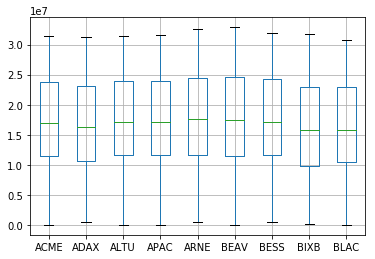

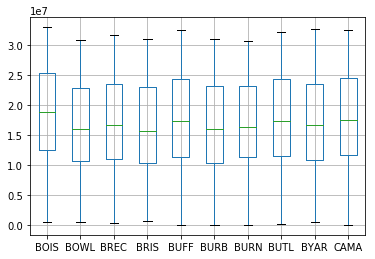

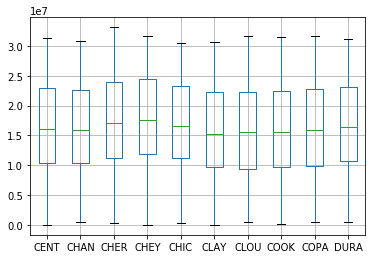

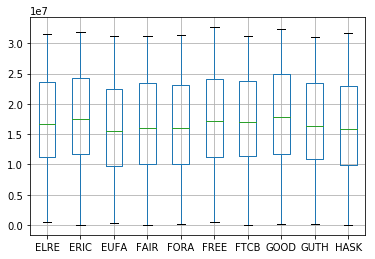

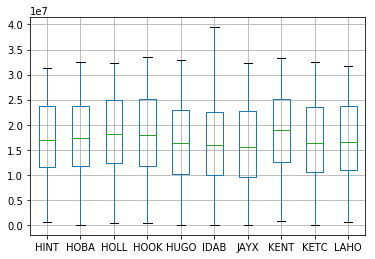

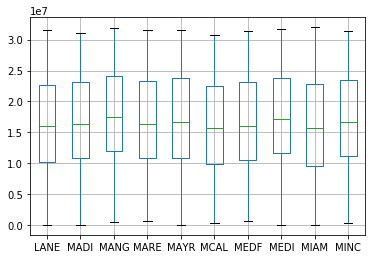

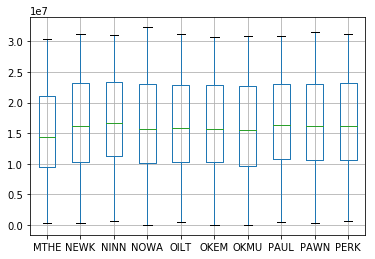

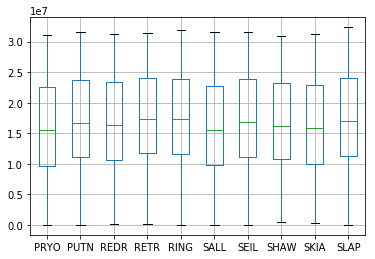

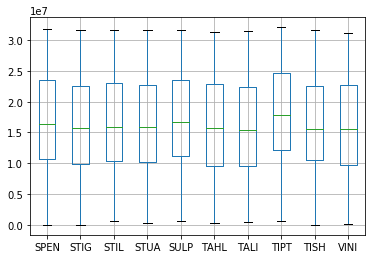

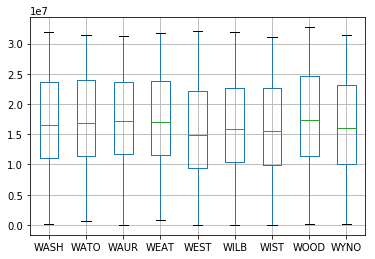

In [8]:
for counter in range(0,91,10):
    train[train.columns[counter:counter+10]].boxplot()
    plt.show()

/opt/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/opt/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


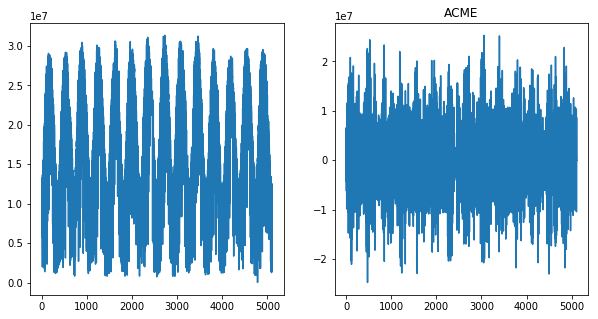

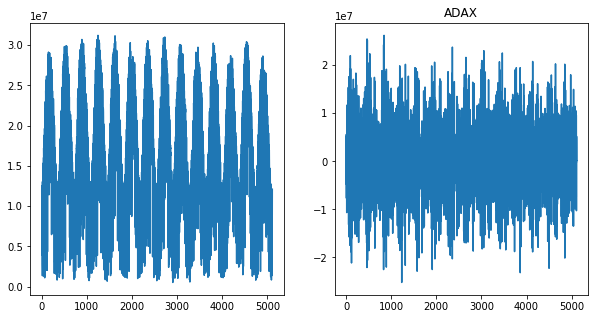

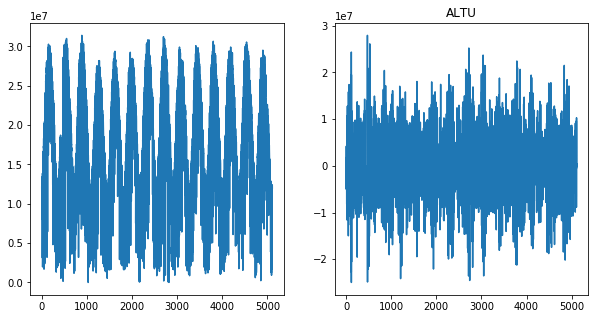

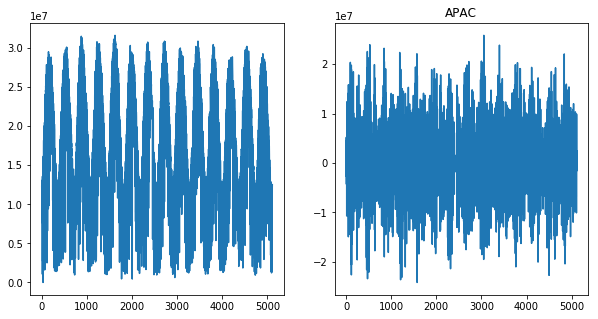

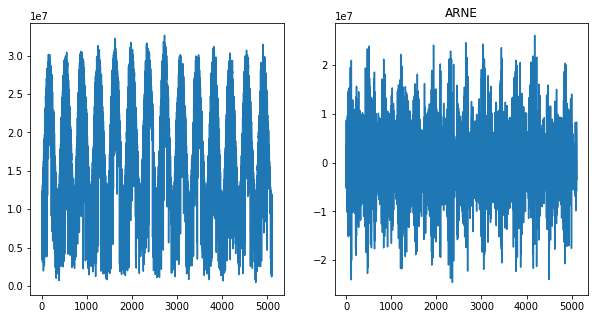

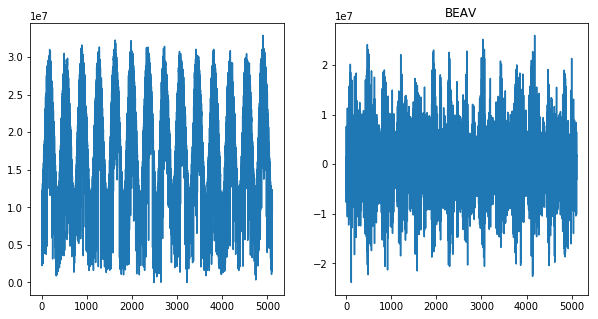

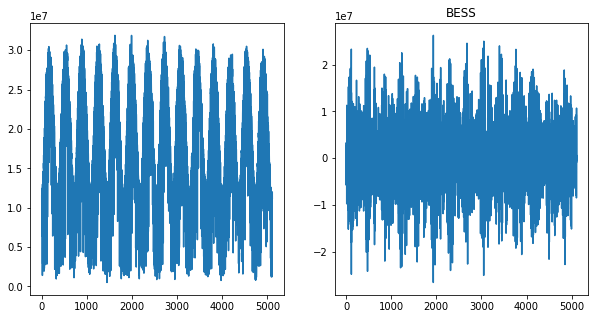

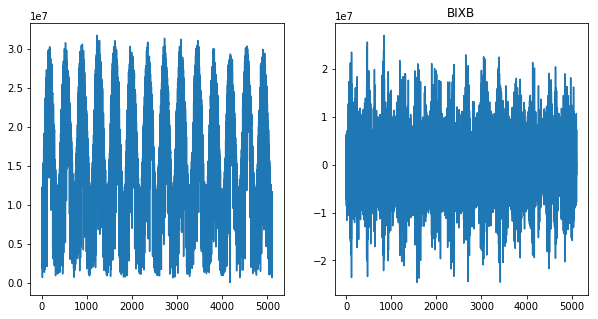

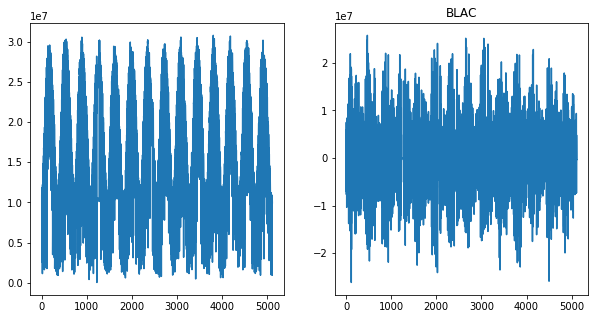

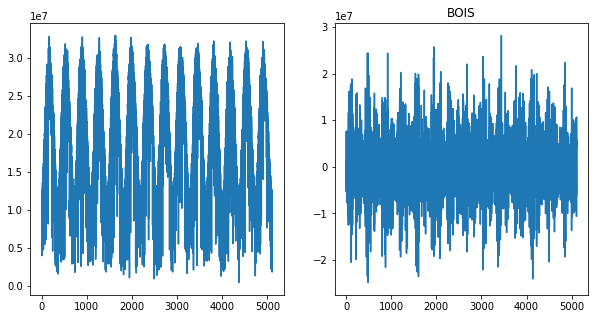

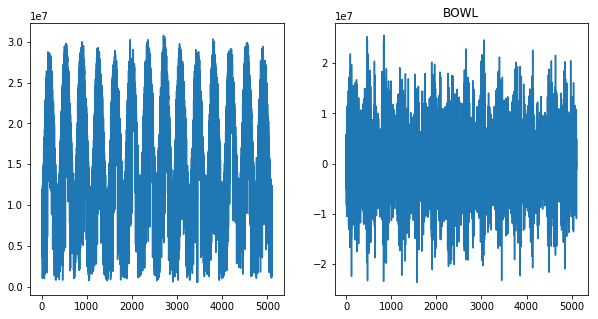

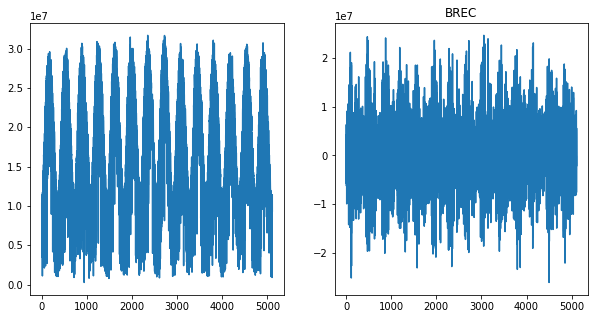

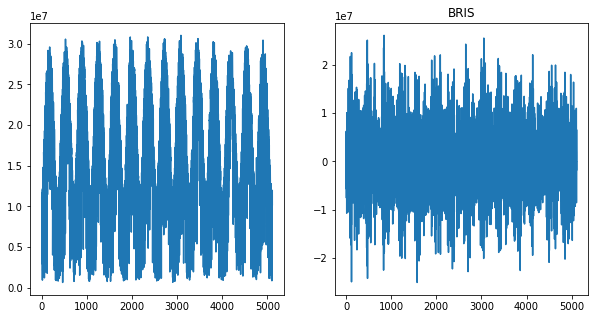

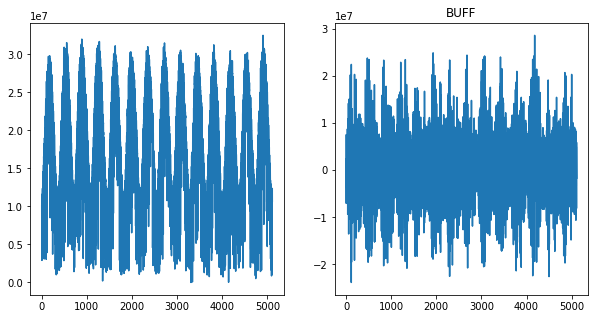

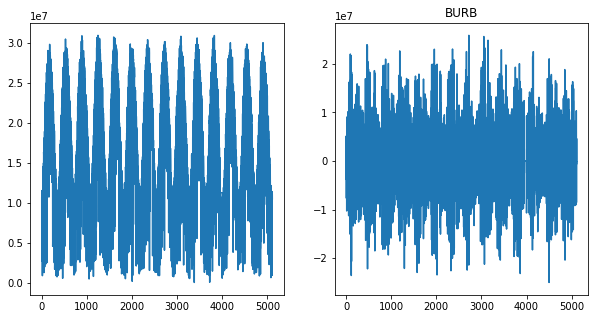

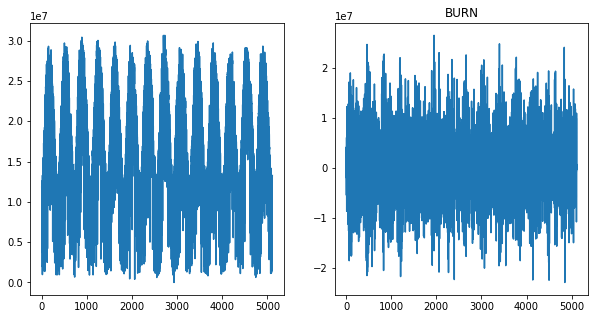

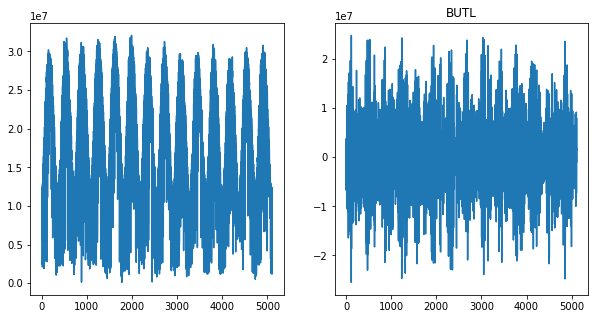

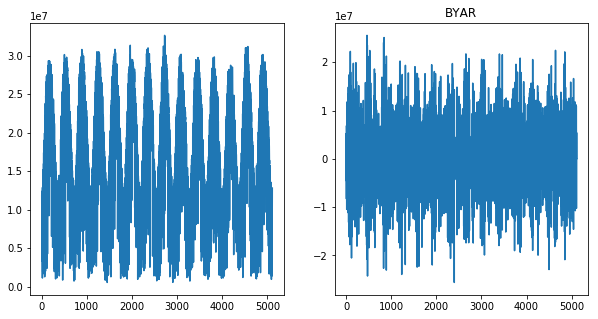

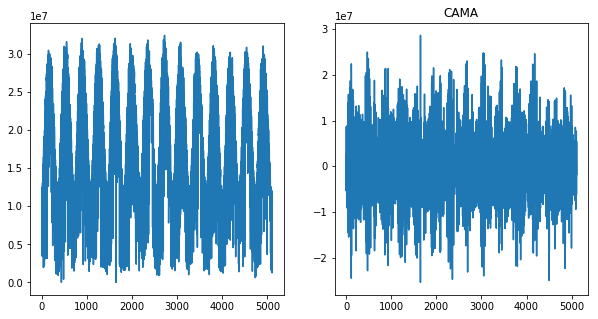

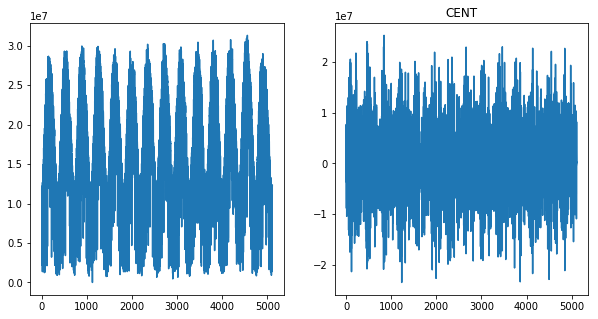

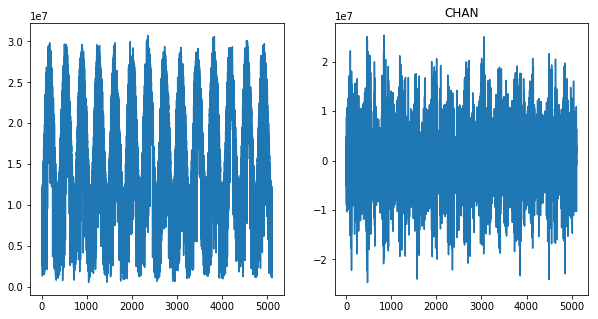

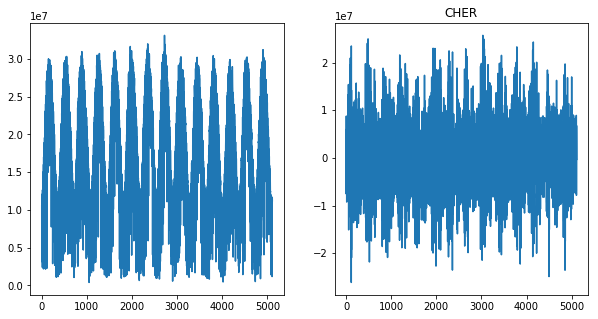

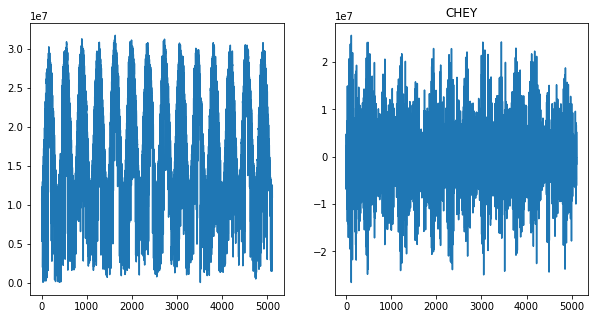

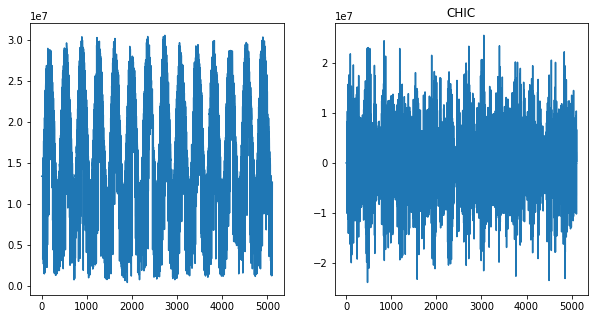

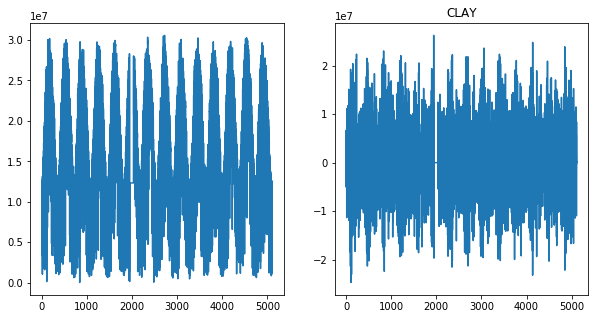

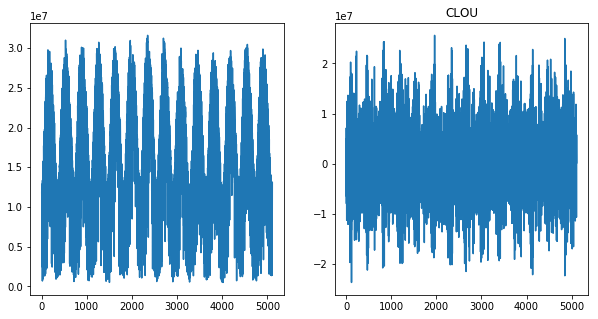

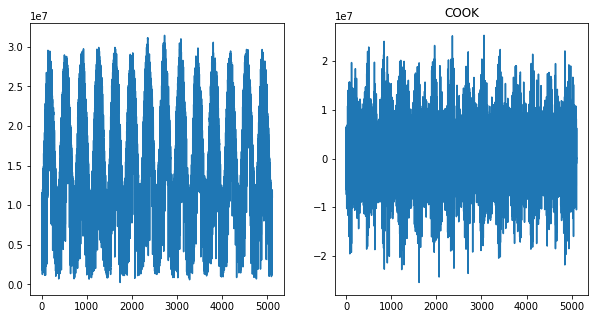

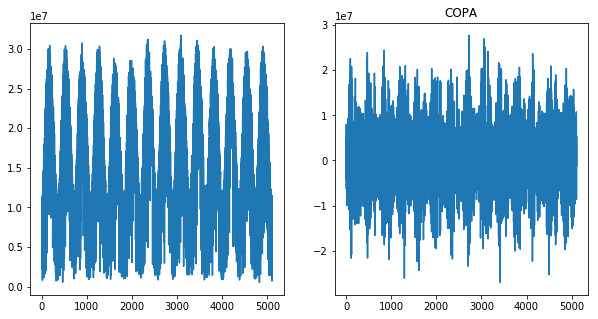

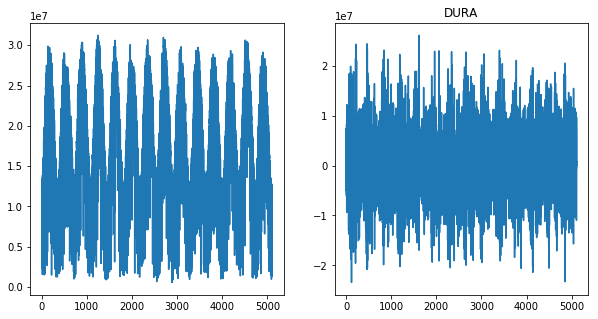

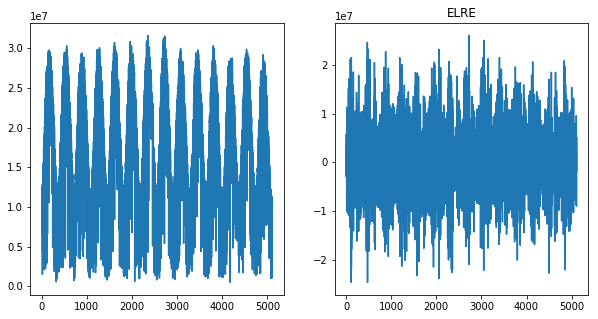

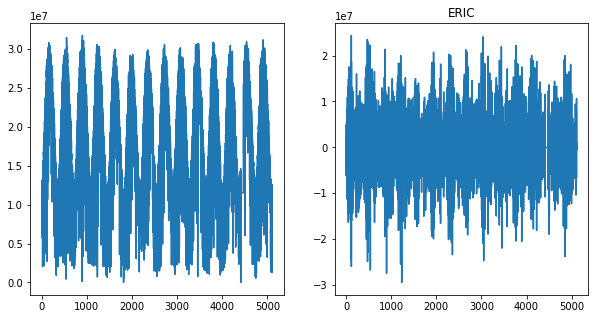

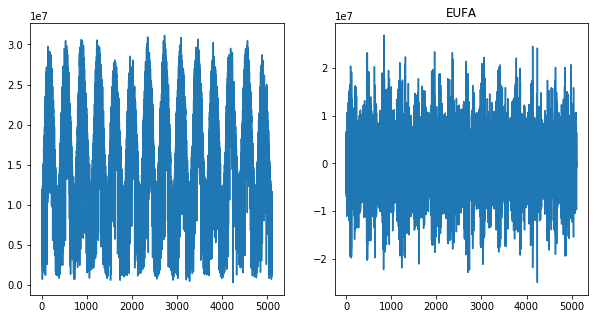

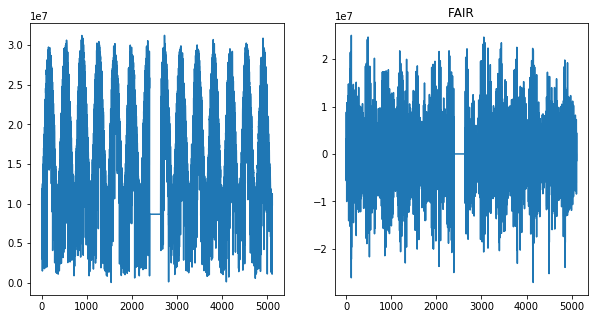

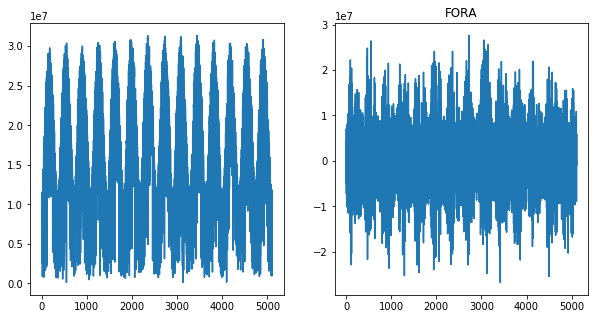

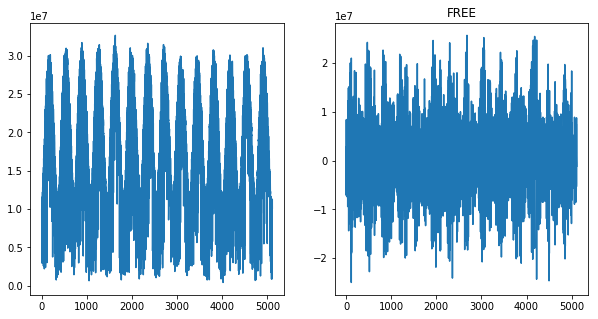

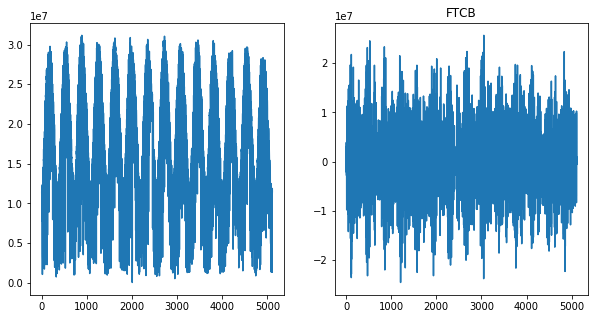

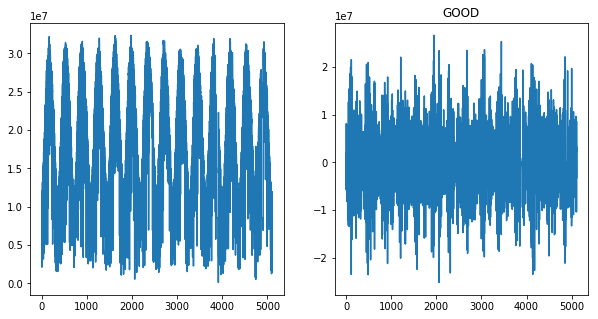

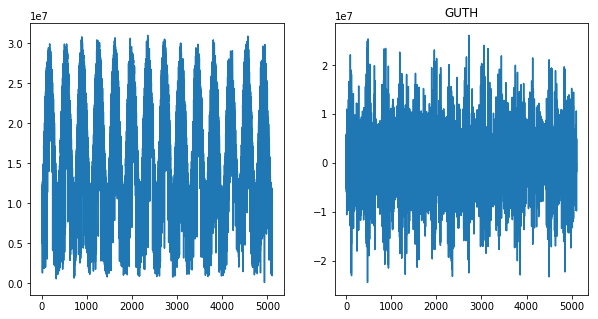

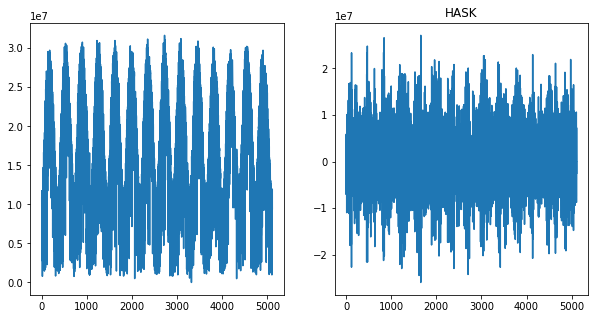

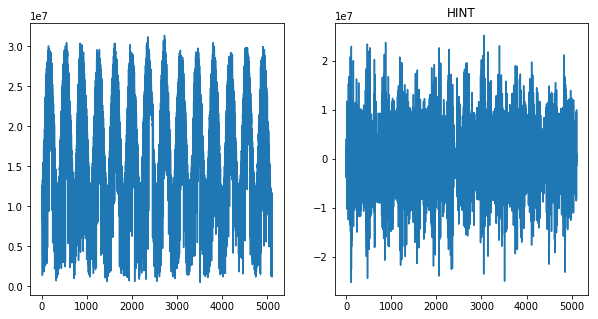

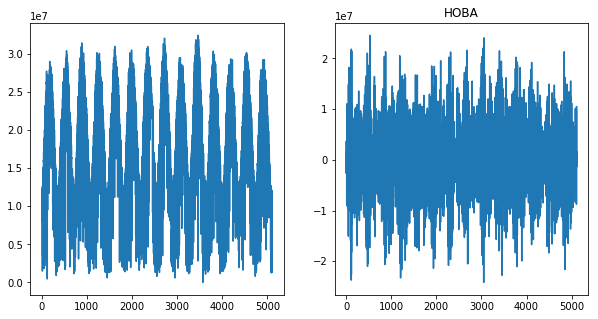

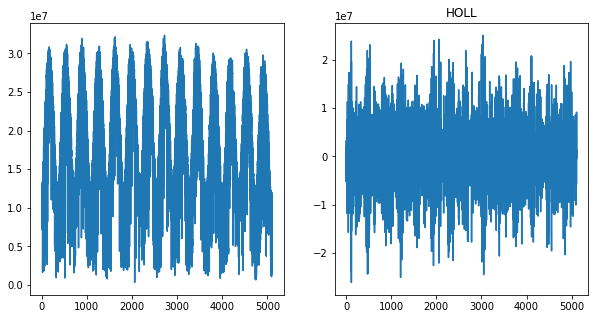

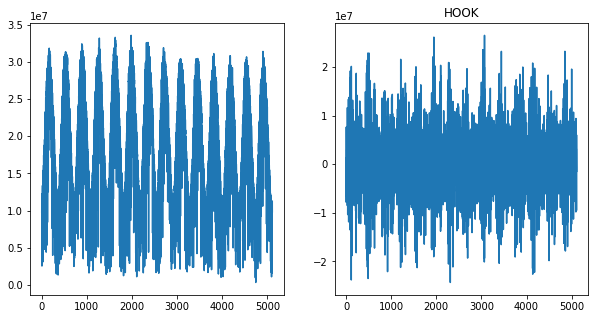

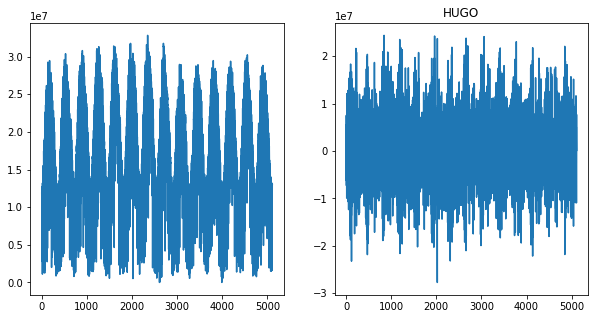

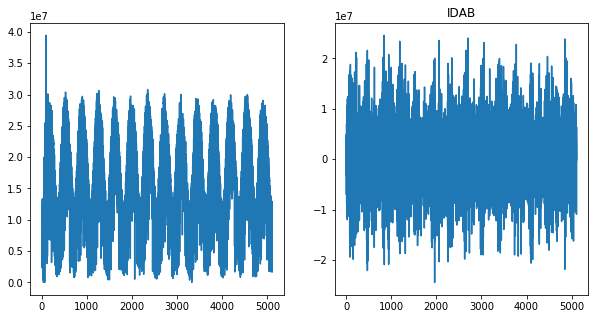

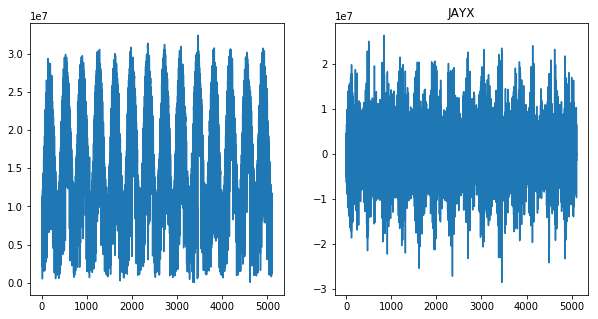

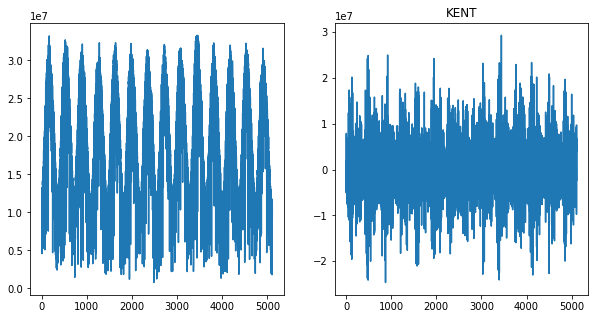

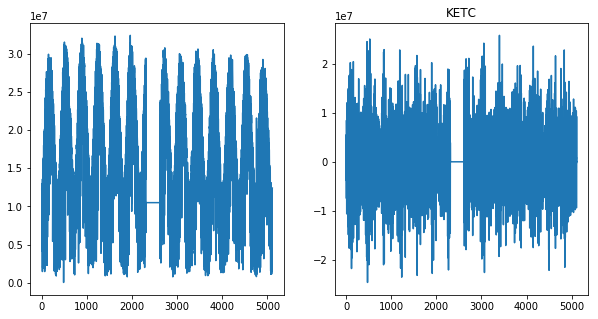

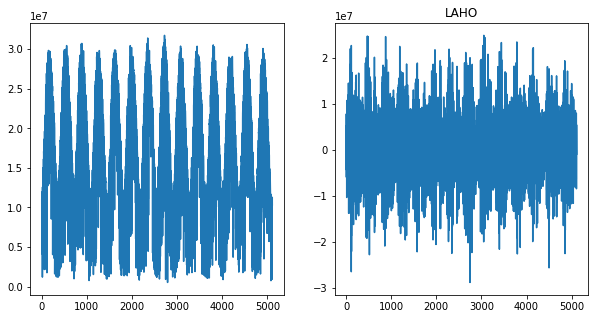

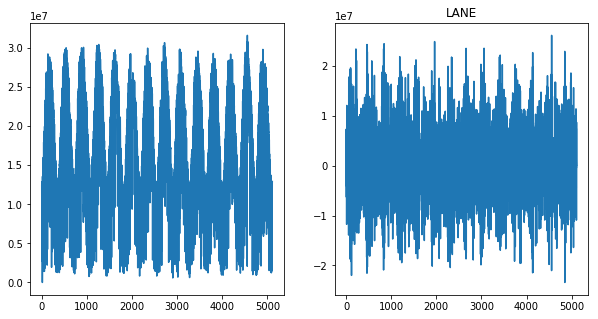

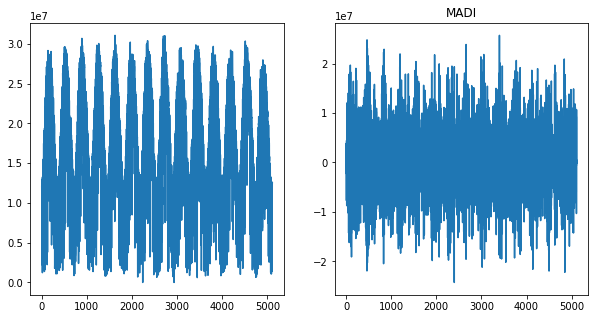

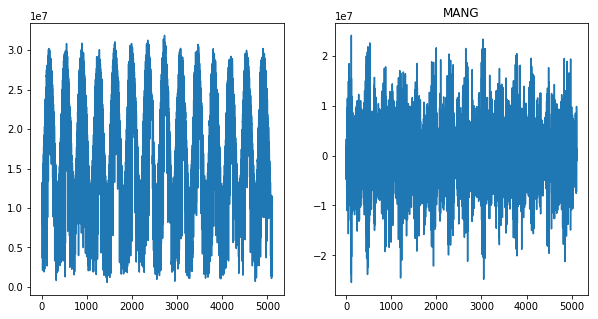

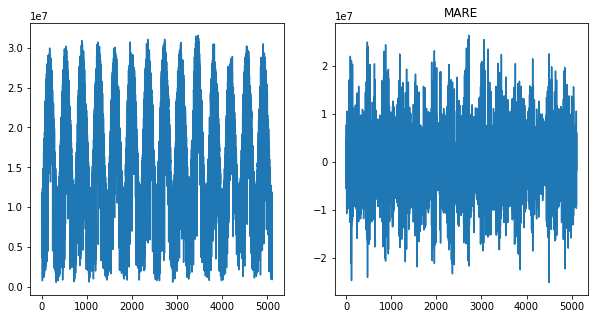

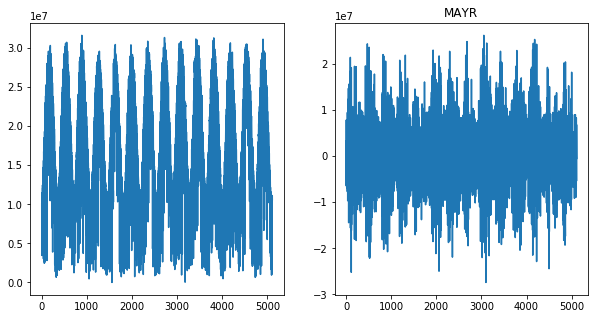

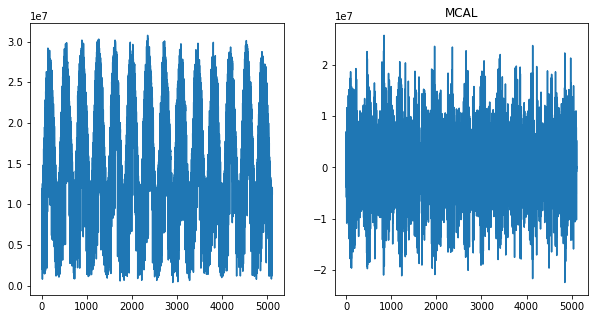

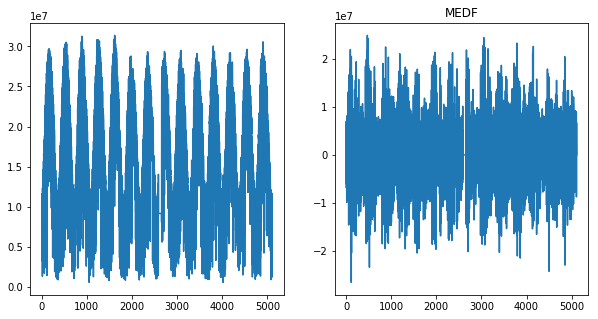

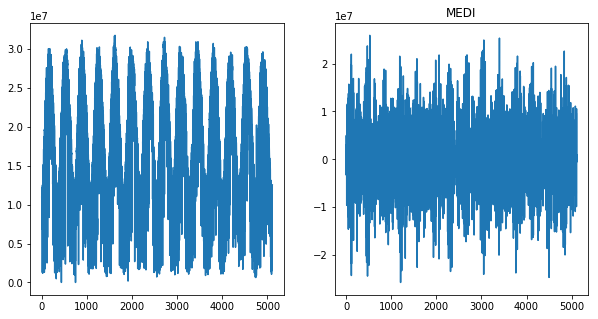

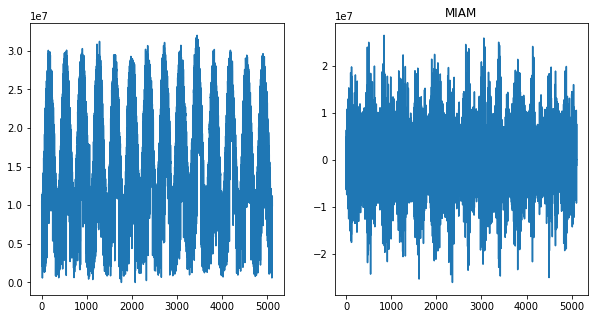

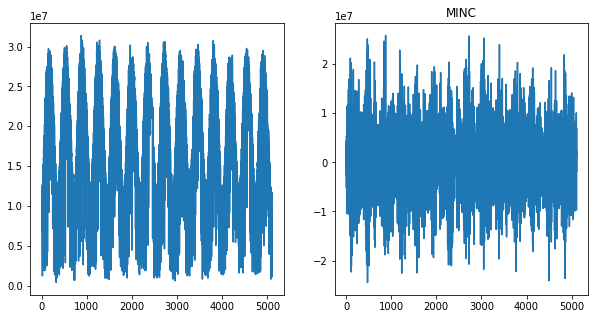

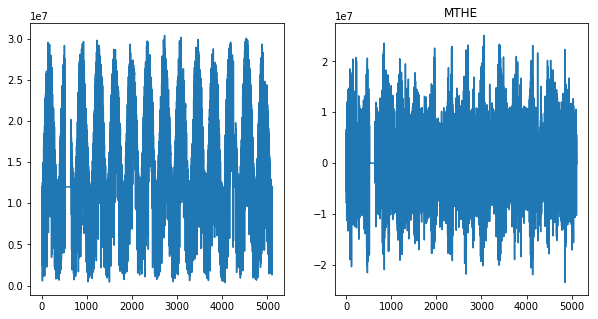

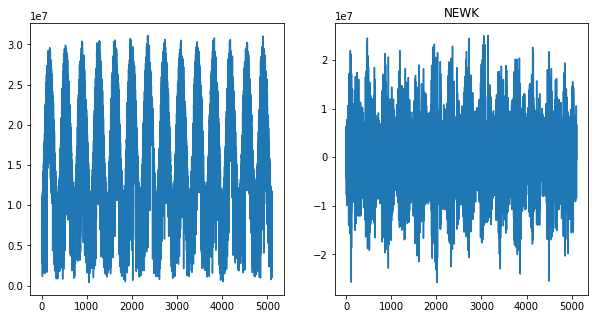

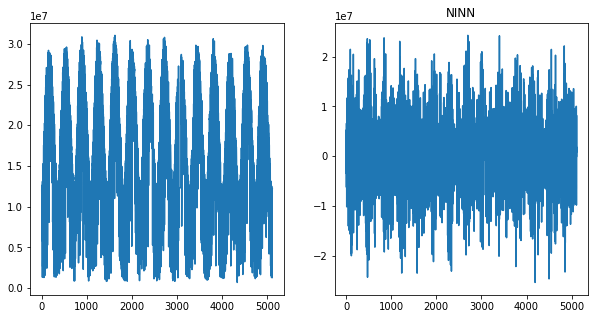

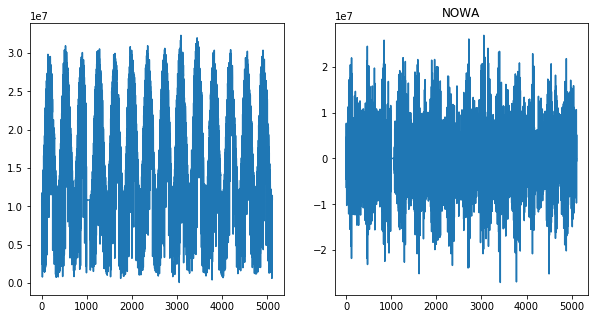

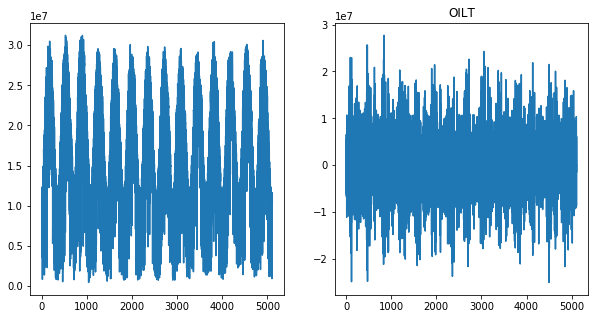

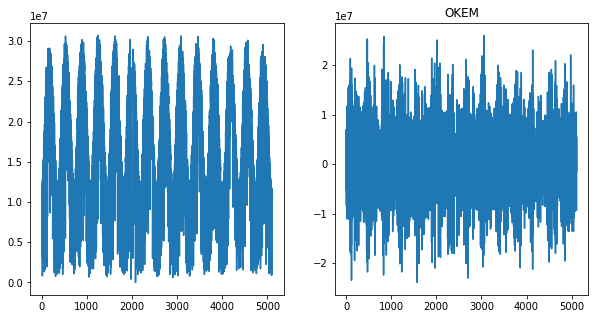

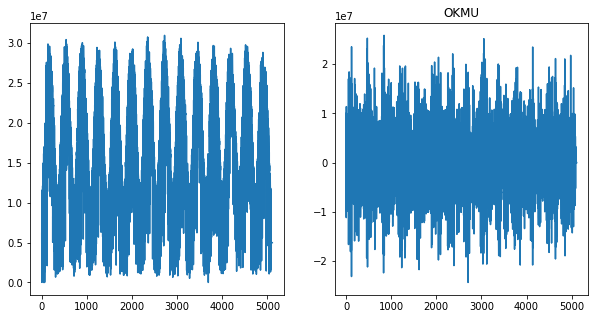

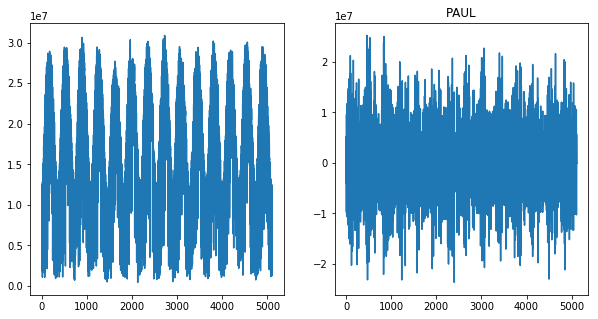

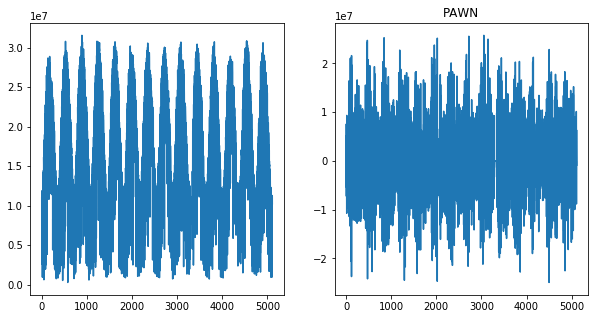

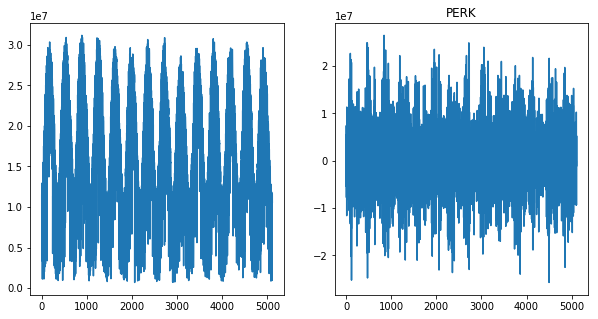

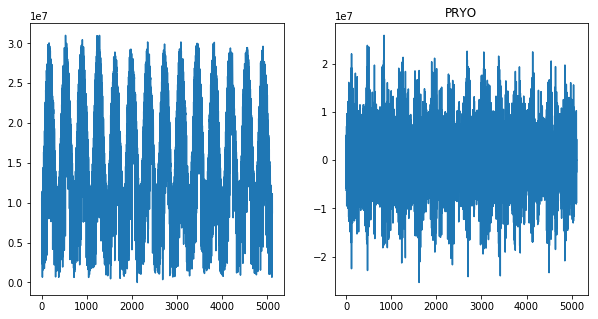

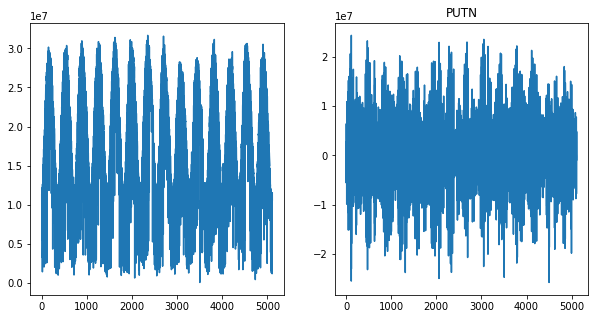

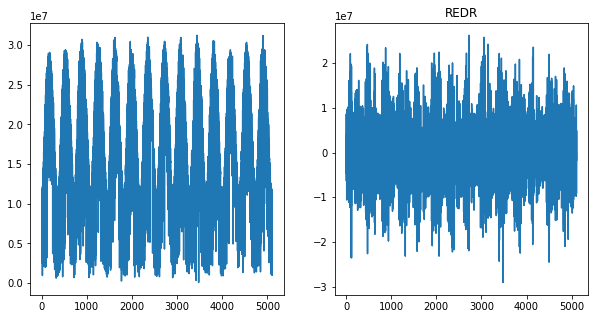

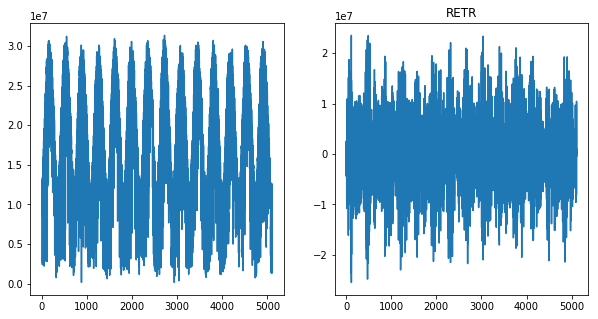

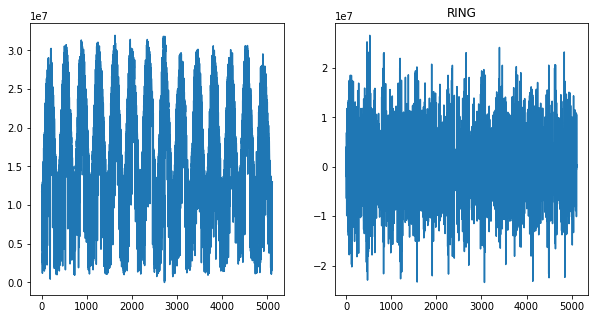

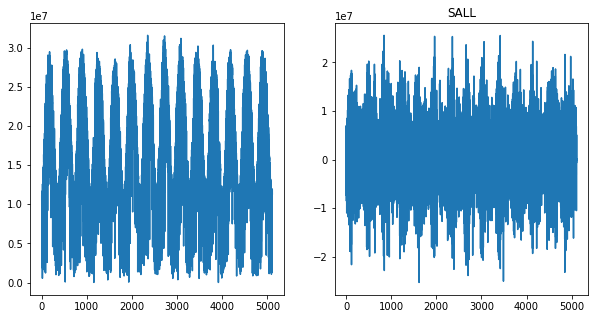

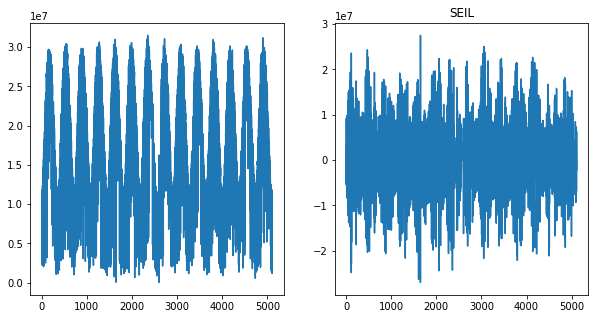

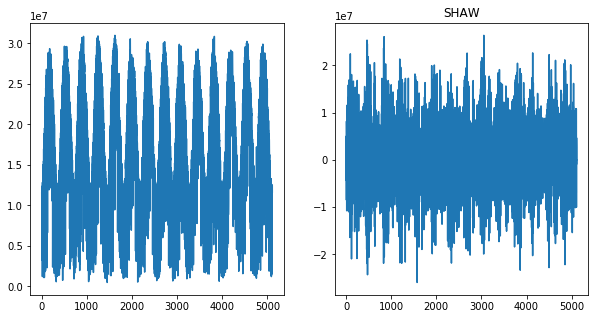

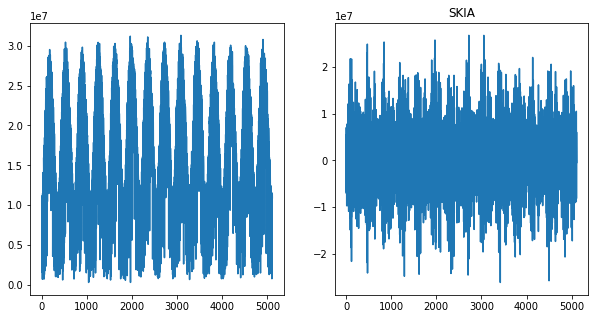

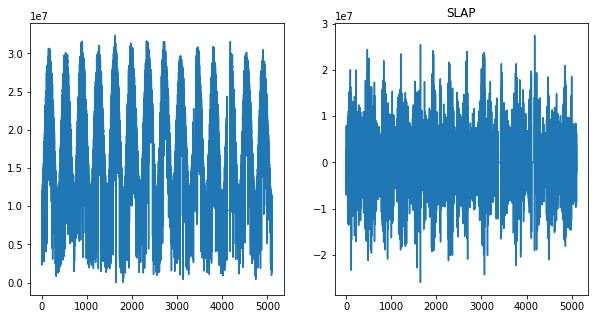

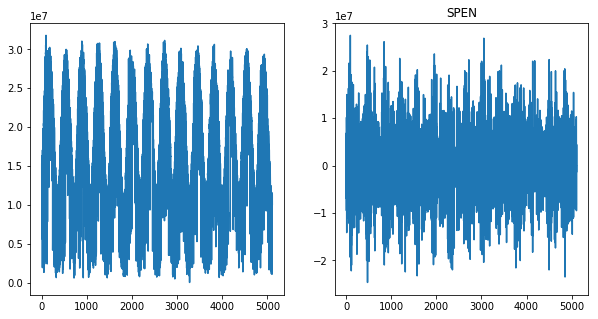

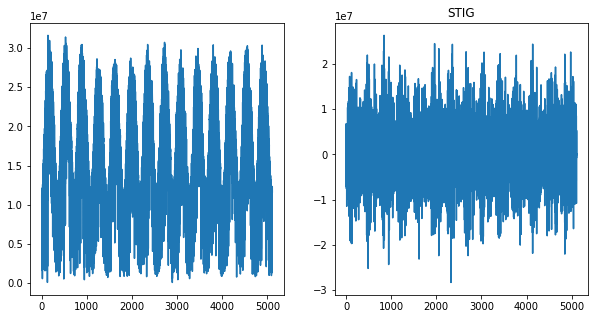

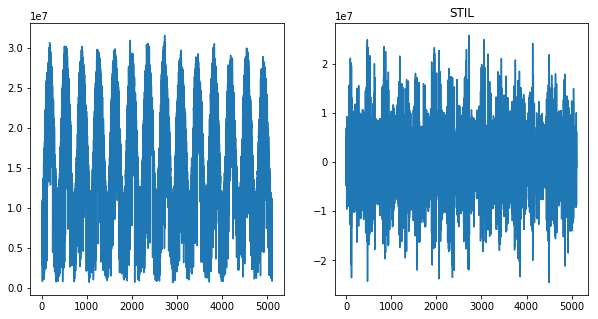

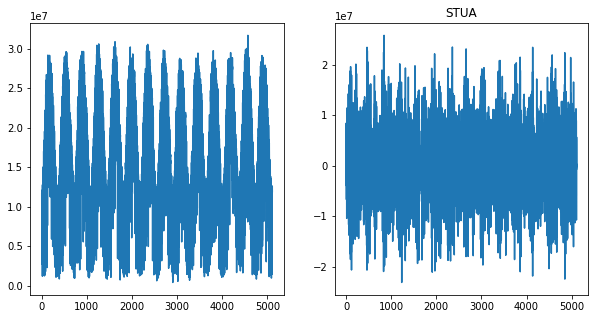

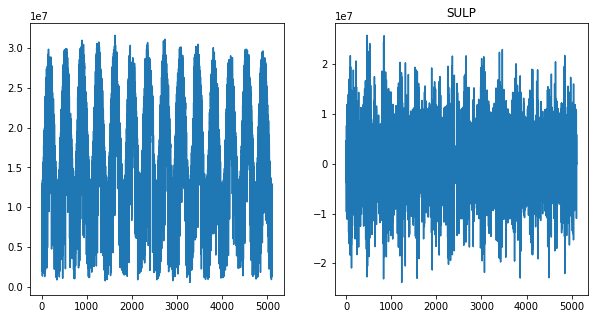

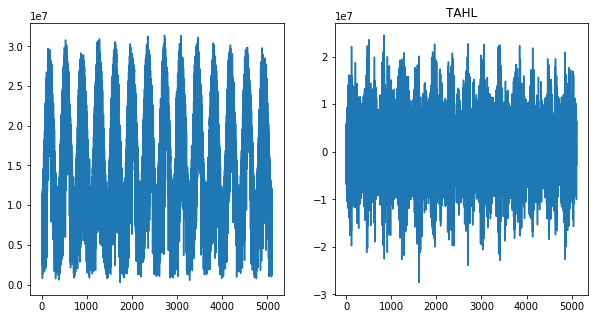

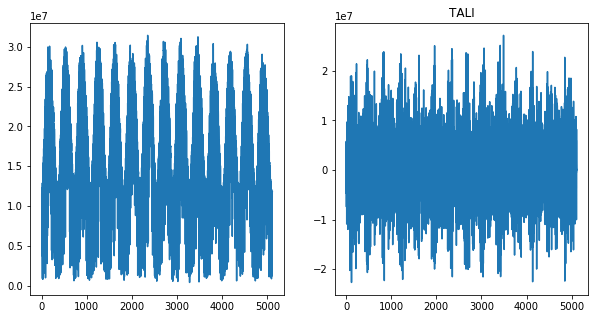

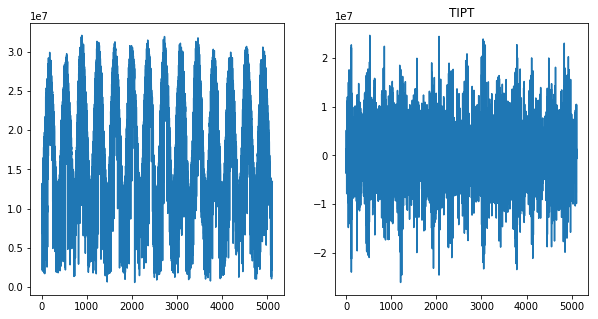

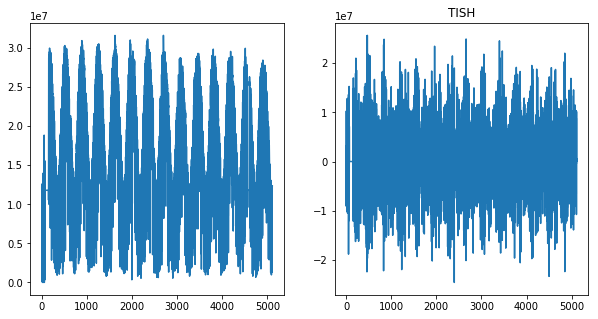

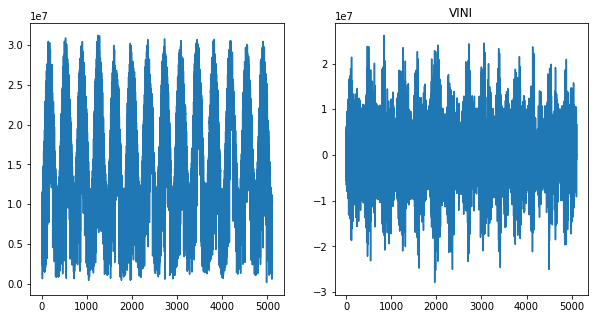

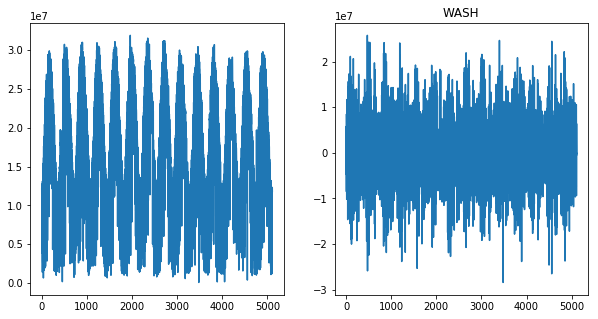

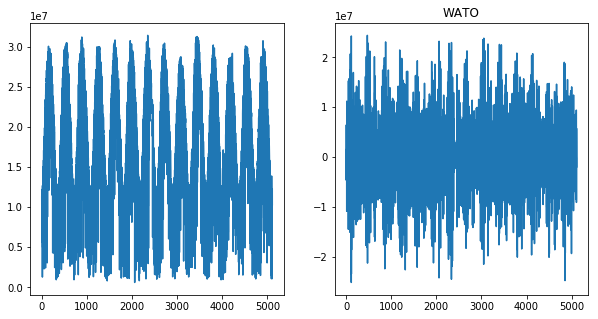

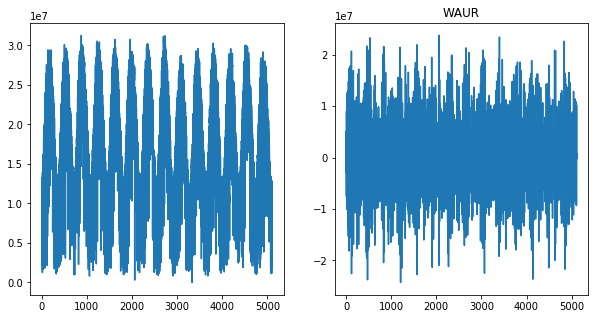

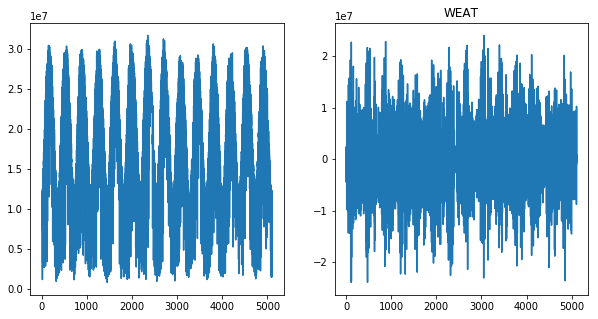

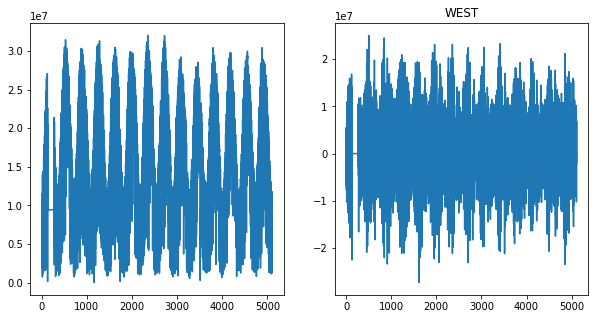

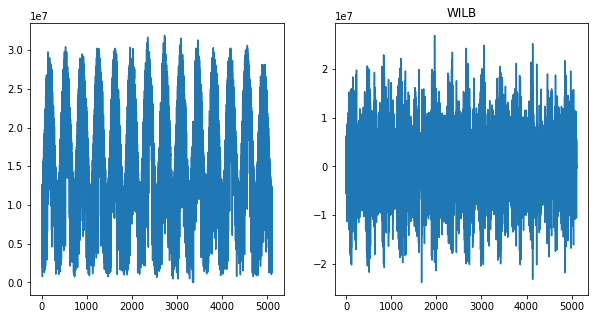

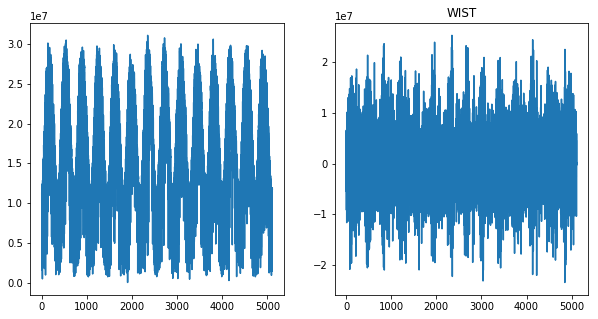

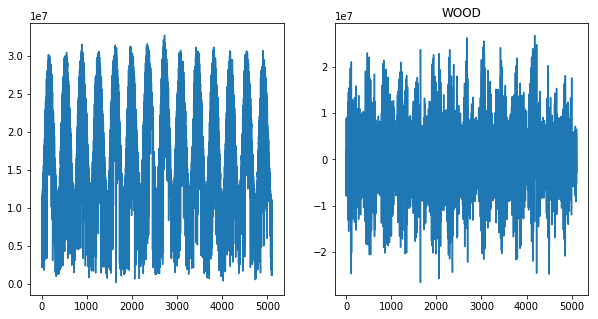

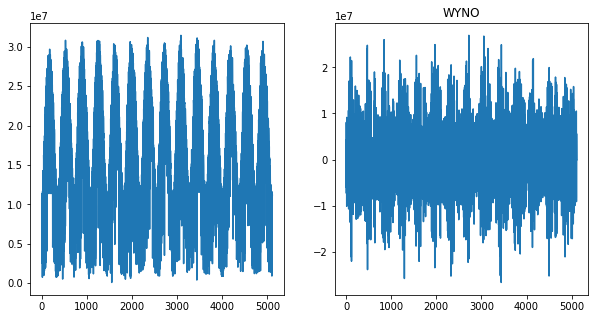

In [10]:
for col in train.columns[1:-2]:
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    plt.title(col)
    ax[0].plot(train[[col]])
    ax[1].plot(train[[col]].diff())
    fig.show()

# EEG

In [12]:
data = pd.read_csv("../Time Series datasets/eeg/data.csv")

In [25]:
data

Unnamed: 0   X1   X2   X3   X4   X5   X6   X7   X8   X9 ...  X170  \
0      X21.V1.791  135  190  229  223  192  125   55   -9  -33 ...   -17   
1      X15.V1.924  386  382  356  331  320  315  307  272  244 ...   164   
2         X8.V1.1  -32  -39  -47  -37  -32  -36  -57  -73  -85 ...    57   
3       X16.V1.60 -105 -101  -96  -92  -89  -95 -102 -100  -87 ...   -82   
4       X20.V1.54   -9  -65  -98 -102  -78  -48  -16    0  -21 ...     4   
5       X14.V1.56   55   28   18   16   16   19   25   40   52 ...   -12   
6       X3.V1.191  -55   -9   52  111  135  129  103   72   37 ...  -125   
7      X11.V1.273    1   -2   -8  -11  -12  -17  -15  -16  -18 ...   -79   
8      X19.V1.874 -278 -246 -215 -191 -177 -167 -157 -139 -118 ...  -400   
9       X3.V1.491    8   15   13    3   -6   -8   -5    4   25 ...    49   
10        X3.V1.6   -5   15   28   28    9  -29  -41  -19   14 ...   -38   
11     X21.V1.724 -167 -230 -280 -315 -338 -369 -405 -392 -298 ...   423   
12      X7.V1.162   92   49    0  -32  -51  -65  -37  -19  -25 ...   -56   
13      X1.V1.211   15   12    0  -17  -28  -31  -39  -51  -44 ...   -88   
14      X1.V1.615  -24  -15   -5   -1    4    3    6   10   11 ...    32   
15     X22.V1.242 -135 -133 -125 -118 -111 -105 -102  -93  -94 ...   -49   
16      X1.V1.863   39   41   41   42   43   43   46   47   49 ...    43   
17      X9.V1.302    9    4   -5  -10  -22  -30  -33  -43  -41 ...    34   
18      X7.V1.541  -21   -5    1    7   19   20   13    2   -1 ...    43   
19      X9.V1.915    4   24   51   76   92  102  104  101   90 ...     3   
20     X23.V1.964  410  451  491  541  581  641  736  757  692 ...   415   
21      X1.V1.614  -24  -27  -23  -28  -34  -40  -47  -43  -38 ...   -81   
22     X11.V1.134 -264 -189 -117  -45   20   70  111  143  161 ...  -231   
23     X18.V1.544   -4   40   78  123  149  185  197  189  167 ...  -189   
24     X19.V1.294  593  328   88 -106 -456 -732 -921 -782 -522 ...   312   
25     X21.V1.802  -16  -15  -19  -16  -14   -5    0   -1   -3 ...    56   
26       X2.V1.72  -20  -38  -53  -58  -66  -66  -69  -77  -87 ...   -26   
27      X3.V1.744 -340 -381 -376 -336 -275 -204 -131  -70  -16 ...   114   
28     X12.V1.733  -30   15   61   80   72   41  -11  -31  -47 ...    -9   
29      X8.V1.614   -1   18   35   36   29   17   10    1   -3 ...    -6   
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ... ...   ...   
11470  X17.V1.232  -62  -33   13   51   89  111  114  124  120 ...    34   
11471  X21.V1.334 -214 -320 -418 -534 -748 -638 -470   42  454 ...  1033   
11472   X5.V1.332  -61  -71  -77  -74  -74  -72  -72  -76  -77 ...   -51   
11473   X4.V1.173 -106 -133 -130 -111  -91  -62  -39    4   42 ...   -80   
11474    X8.V1.88  -50  -48  -63  -62  -46  -24   -1   13   27 ...    44   
11475   X7.V1.462  -68  -43  -24   -3  -15  -16  -15  -17  -19 ...    87   
11476  X22.V1.984 -293 -297 -302 -307 -318 -331 -347 -361 -369 ...    12   
11477  X10.V1.421   28   36   26    4  -35  -52  -51  -39  -12 ...     4   
11478   X3.V1.554  452  470  401  291  163   83   20  -32  -61 ...   182   
11479  X16.V1.353   62   68   75   75   75   77   81   85   82 ...    -1   
11480   X13.V1.26   26   33   31   26   31   40   49   61   61 ...     6   
11481   X8.V1.444  -86 -101 -115 -129 -139 -147 -154 -159 -165 ...   -39   
11482   X8.V1.904 -121    4  104  185  269  352  405  421  392 ...   339   
11483   X1.V1.902    7   30   16   10   17   23   42   31   34 ...   190   
11484  X13.V1.583  -18  -12   -5   -4   -3   -9  -16  -27  -35 ...   -63   
11485    X7.V1.81  -27   -8  -22  -48  -75  -99 -109 -105  -99 ...   -43   
11486  X15.V1.601    7  -28  -46  -45  -31    2   17   12   -2 ...    39   
11487  X17.V1.874   98  107  121  143  166  184  185  174  153 ...   -31   
11488  X20.V1.494  267  409  450  416  334  248  173  113   67 ...   413   
11489    X7.V1.51   90   83   69   41   31   40   58   75   82 ...    83   
11490  X14.V1.404  -22  -64 -121 -201 -292 -336 -398 -5

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f04d0cfbf60>]],
      dtype=object)

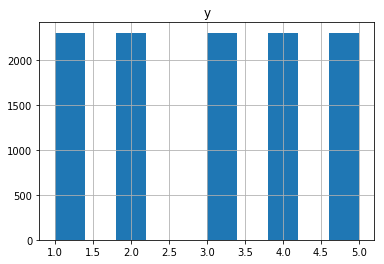

In [16]:
data.hist('y')

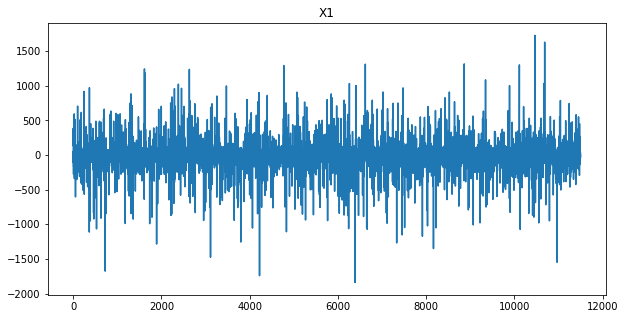

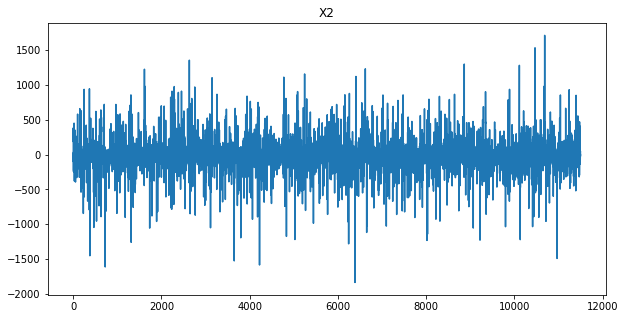

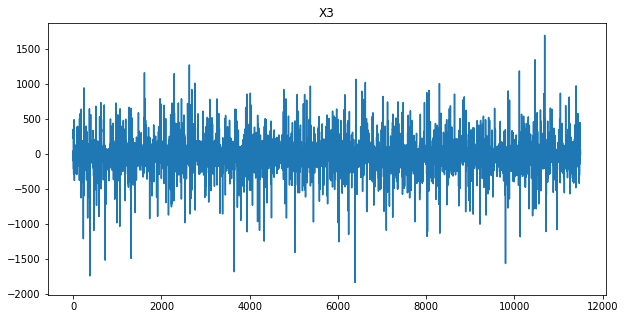

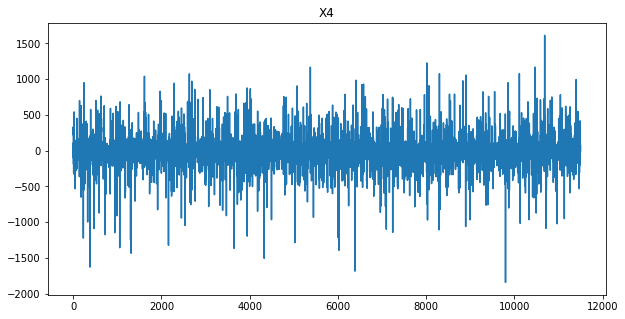

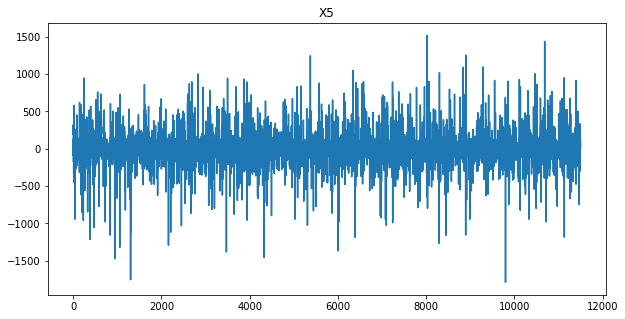

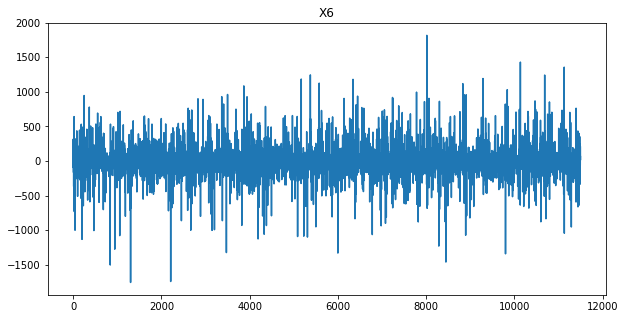

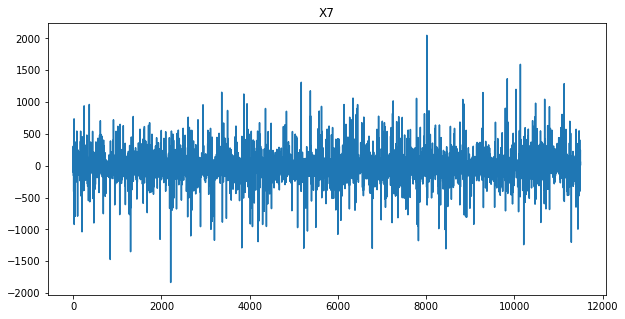

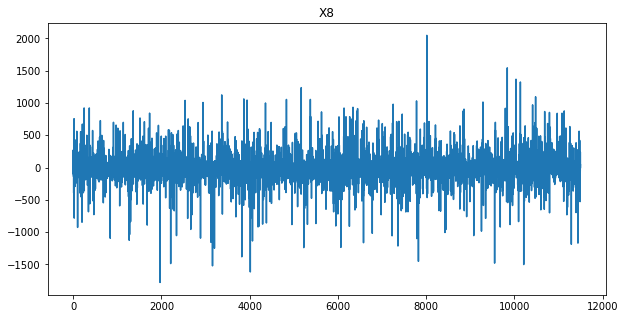

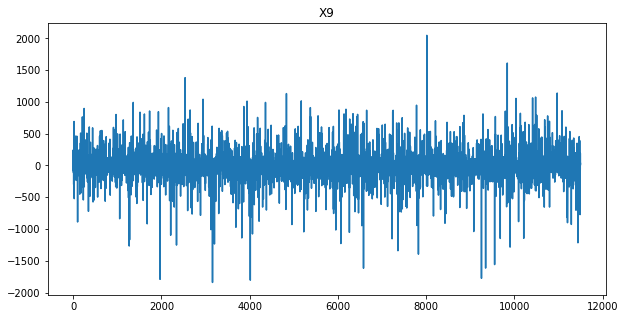

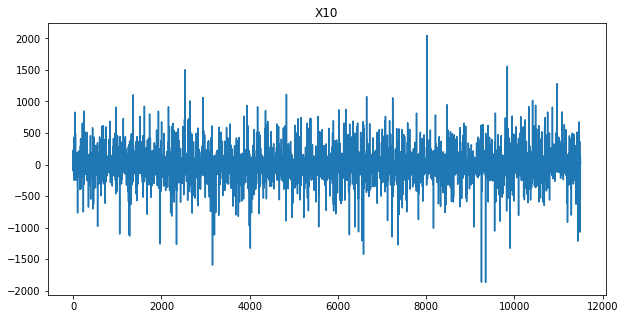

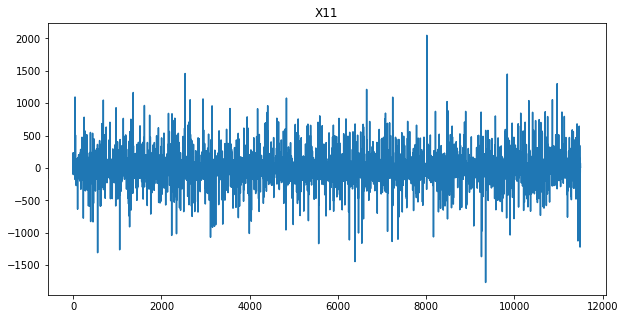

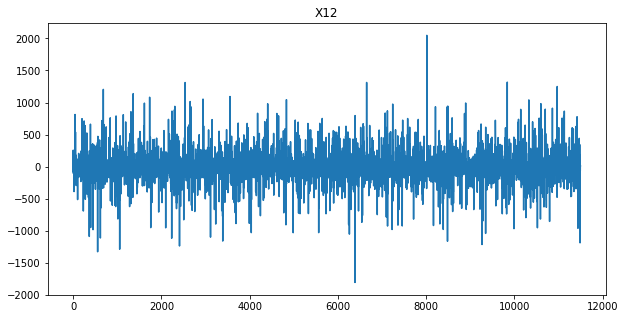

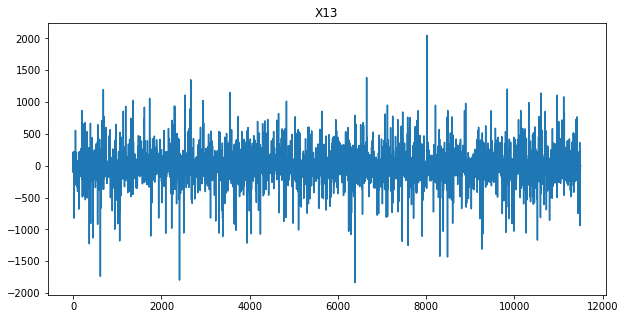

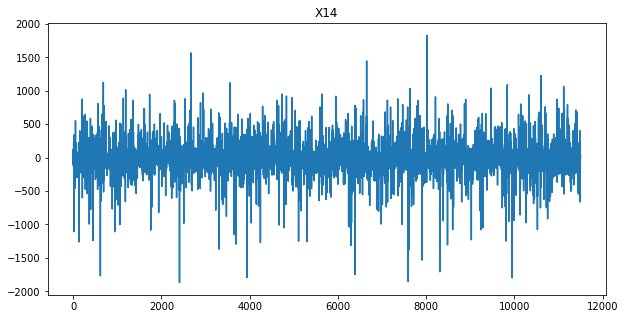

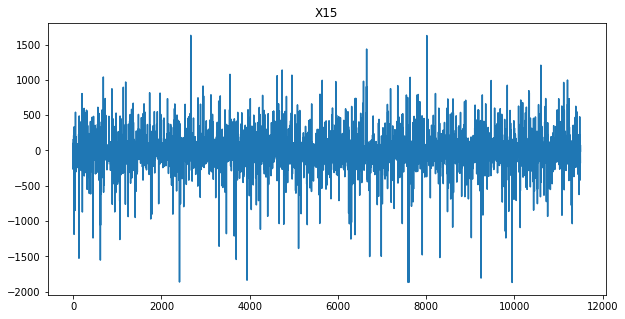

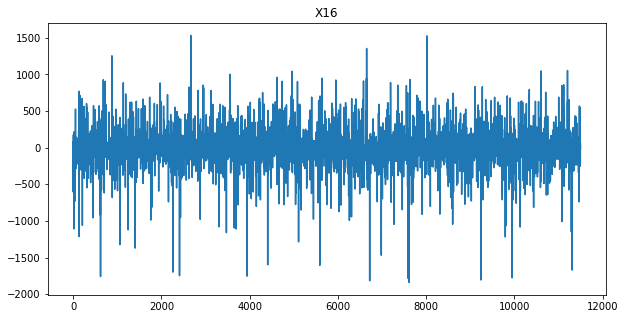

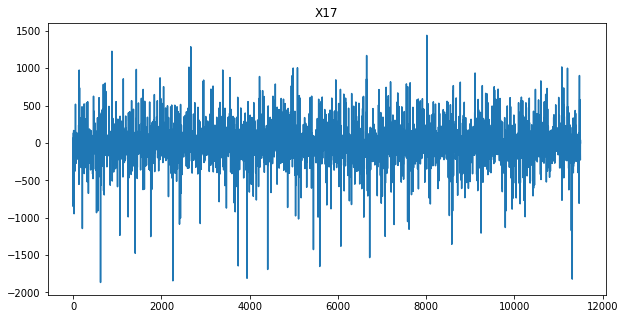

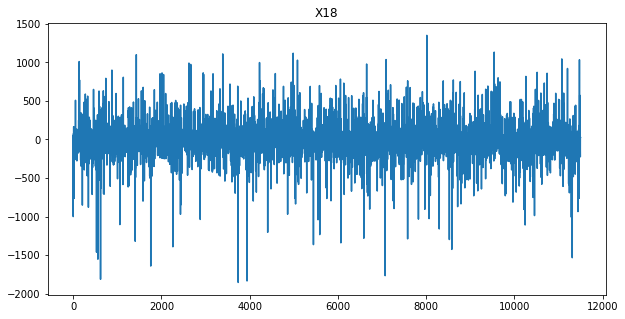

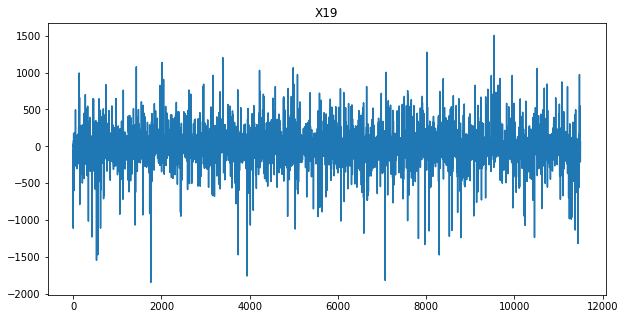

In [30]:
for i in range(1,20):
    plt.figure(figsize=(10,5))
    plt.title(data.columns[i])
    plt.plot(data.values[:,i])
    plt.show()